# Large Value Fund Prediction Modelling: Linear Regression

This section uses a Linear Regression model to predict the probable direction of prices for the top 4 Large Value (High Yield Dividend funds) ETFs by fund size (in billions - USD). As mentioned on Notebook 2, those index funds are:<br />

IWD - iShares Russell 1000 Value ETF
SCHD - Schwab U.S. Dividend Equity ETF
VYM - Vanguard High Dividend Yield Index Fund
DGRO - iShares Core Dividend Growth ETF

<br />
The notebook's sections about the Prediction / Machine Learning Model are:<br />
1. Set up libraries, download historical data & visualize data<br />
2. Creating & training the linear regression model<br />
3. Model evaluation<br />
4. Graphing linear regression models (with training data)<br />
5. Prediction from our model<br />
6. Regression evaluation<br />
7. Linear regression scatterplots (price vs time) with test data<br />
8. Graphing 'predicted price vs actual price' scatterplots<br />
9. Plot residual histograms<br />
10. Perform error evaluation metrics<br />
11. Perform accuracy evaluation metrics<br />
12. Results - IMPORTANT<br />
13. Conclusion - IMPORTANT<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’.<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields).<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# What is linear regression?

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. The regression model predicts the value of the dependent variable, which is the response or outcome variable being analyzed or studied & simulates a mathematical relationship between variables and makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc. In this case, our prediction is based on the following question - Will prices continue to increase for the top 4 large blend funds on the long run?

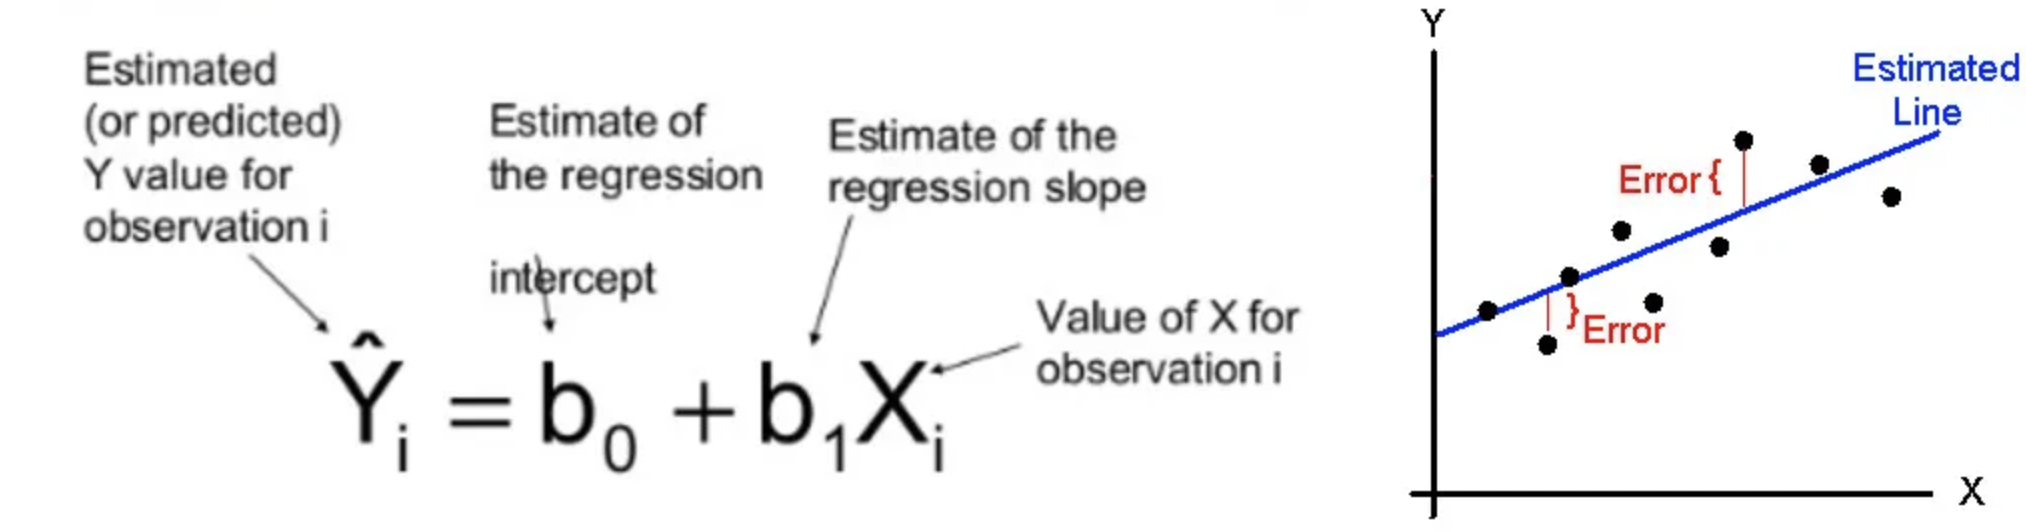

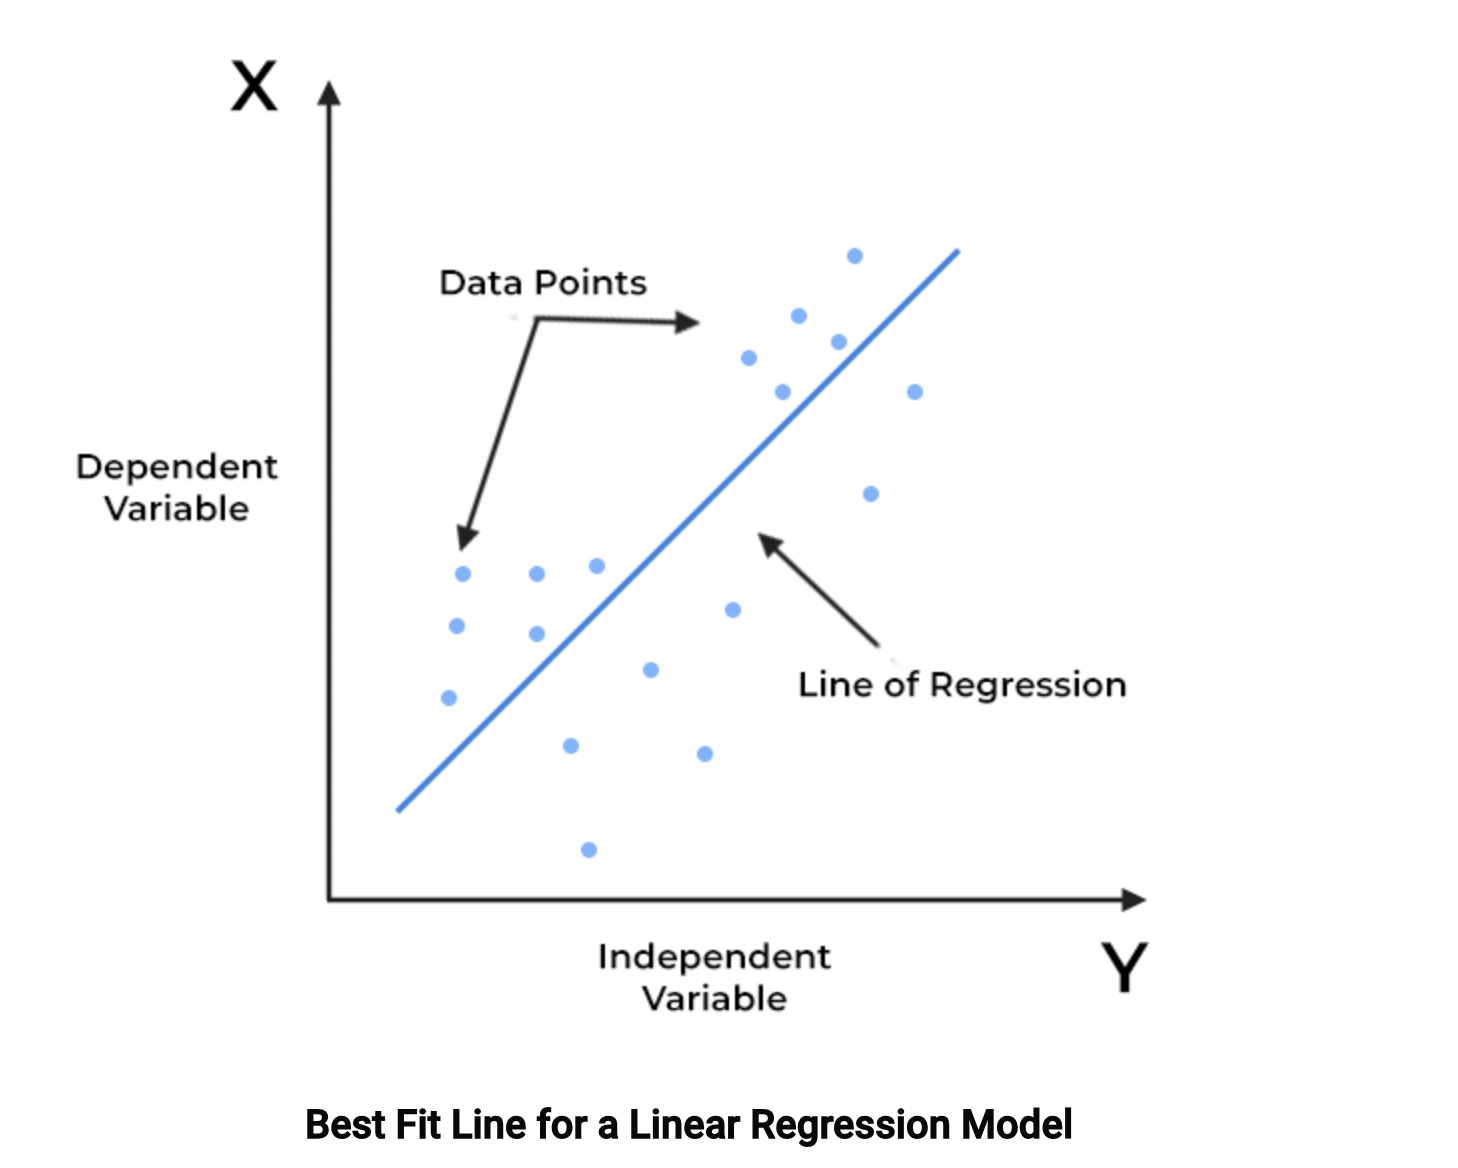

# Step 1 - Set up libraries, download historical data & visualize data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf

# Machine Learning Libraries
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [2]:
# Get data; starting dates are the funds' inception dates
iwd = yf.download("IWD", '2000-05-22', '2023-12-30')
schd = yf.download("SCHD", '2011-10-20', '2023-12-30')
vym = yf.download("VYM", '2006-11-10', '2023-12-30')
dgro = yf.download("DGRO", '2014-06-10', '2023-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Check index
iwd
#schd
#vym
#dgro

Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-05-26   55.500000   55.734375   55.437500   55.500000   32.566948   
2000-05-30   55.890625   56.140625   55.890625   56.140625   32.942856   
2000-05-31   56.515625   56.828125   56.515625   56.546875   33.181248   
2000-06-01   56.812500   57.328125   56.812500   57.062500   33.483807   
2000-06-02   58.375000   58.515625   58.093750   58.093750   34.088932   
...                ...         ...         ...         ...         ...   
2023-12-22  164.139999  164.949997  163.699997  164.279999  164.279999   
2023-12-26  164.610001  165.679993  164.410004  165.220001  165.220001   
2023-12-27  165.289993  165.720001  164.919998  165.460007  165.460007   
2023-12-28  165.279999  165.970001  165.279999  165.699997  165.699997   
2023-12-29  165.529999  165.850006  164.770004  165.250000  165.250000   

             Volume  
Date                 
2000-05-26     9500  
2000-05-30     1200  
2000-05-31    25500  
2000-06-01    15300  
2000-06-02    14200  
...             ...  
2023-12-22  2599800  
2023-12-26  2949400  
2023-12-27  2524600  
2023-12-28  2260400  
2023-12-29  3275800  

[5936 rows x 6 columns]

In [4]:
# Check data types in columns
iwd.info()
#schd.info()
#vym.info()
#dgro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5936 entries, 2000-05-26 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5936 non-null   float64
 1   High       5936 non-null   float64
 2   Low        5936 non-null   float64
 3   Close      5936 non-null   float64
 4   Adj Close  5936 non-null   float64
 5   Volume     5936 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 324.6 KB


### Check descriptive statistics

In [5]:
# Get descriptive statistics summary of IWD data set 
iwd.describe()

Open         High          Low        Close    Adj Close  \
count  5936.000000  5936.000000  5936.000000  5936.000000  5936.000000   
mean     90.253892    90.741367    89.686606    90.244604    73.501419   
std      34.905524    35.044694    34.779895    34.911391    39.536152   
min      33.849998    35.139999    23.400000    34.189999    23.985743   
25%      59.797500    60.097499    59.395001    59.787500    41.541320   
50%      80.764999    81.115002    80.310001    80.735001    56.315887   
75%     117.115000   117.452497   116.547501   117.074999   103.716459   
max     170.720001   171.419998   169.759995   170.509995   165.699997   

             Volume  
count  5.936000e+03  
mean   1.758132e+06  
std    1.492784e+06  
min    3.000000e+02  
25%    7.705000e+05  
50%    1.481100e+06  
75%    2.335875e+06  
max    1.349440e+07

In [6]:
# Get descriptive statistics summary of SCHD data set 
schd.describe()

Open         High          Low        Close    Adj Close  \
count  3068.000000  3068.000000  3068.000000  3068.000000  3068.000000   
mean     50.161307    50.397846    49.882340    50.158804    42.644487   
std      16.097873    16.208614    15.980682    16.101309    18.027425   
min      24.270000    24.469999    24.250000    24.250000    16.657618   
25%      38.169998    38.297500    37.959999    38.147501    28.568905   
50%      47.505001    47.934999    47.235001    47.525002    39.387381   
75%      63.830002    64.127502    63.435000    63.780001    57.468430   
max      82.050003    82.480003    81.559998    81.940002    76.320000   

             Volume  
count  3.068000e+03  
mean   1.229567e+06  
std    1.295530e+06  
min    4.500000e+04  
25%    3.325250e+05  
50%    6.445000e+05  
75%    1.784075e+06  
max    1.091690e+07

In [7]:
# Get descriptive statistics summary of VYM data set 
vym.describe()

Open         High          Low        Close    Adj Close  \
count  4308.000000  4308.000000  4308.000000  4308.000000  4308.000000   
mean     68.866038    69.194197    68.444276    68.843890    55.665043   
std      23.666477    23.773728    23.601047    23.691432    26.937410   
min      22.740000    23.459999    17.040001    22.930000    14.320611   
25%      48.299999    48.547500    47.957500    48.250000    30.732472   
50%      67.829998    68.075001    67.430000    67.790001    51.641449   
75%      86.037498    86.432501    85.702497    86.022497    73.699118   
max     115.169998   115.660004   114.510002   115.010002   111.830002   

             Volume  
count  4.308000e+03  
mean   8.308794e+05  
std    8.568845e+05  
min    9.000000e+02  
25%    2.011500e+05  
50%    6.130500e+05  
75%    1.150600e+06  
max    1.020690e+07

In [8]:
# Get descriptive statistics summary of DGRO data set 
dgro.describe()

Open         High          Low        Close    Adj Close  \
count  2405.000000  2405.000000  2405.000000  2405.000000  2405.000000   
mean     38.010961    38.185720    37.792034    38.000650    34.437760   
std       9.771383     9.839011     9.722698     9.784136    10.902074   
min      23.700001    23.860001    22.750999    23.709999    19.318966   
25%      28.190001    28.219999    28.080000    28.150000    23.581406   
50%      36.520000    36.686001    36.320000    36.500000    32.394272   
75%      48.860001    49.188000    48.435001    48.830002    46.951603   
max      56.150002    56.424999    55.830002    56.060001    53.900002   

             Volume  
count  2.405000e+03  
mean   1.156247e+06  
std    1.361918e+06  
min    1.200000e+03  
25%    2.577000e+05  
50%    1.012100e+06  
75%    1.647600e+06  
max    3.116650e+07

In [9]:
# Create a new DataFrame with only closing price and date
iwd_df = pd.DataFrame(iwd, columns=['Close'])
schd_df = pd.DataFrame(schd, columns=['Close'])
vym_df = pd.DataFrame(vym, columns=['Close'])
dgro_df = pd.DataFrame(dgro, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
iwd_df = iwd_df.reset_index()
schd_df = schd_df.reset_index()
vym_df = vym_df.reset_index()
dgro_df = dgro_df.reset_index()

In [10]:
# Check for missing values in the columns
iwd_df.isna().values.any()
#schd_df.isna().values.any()
#vym_df.isna().values.any()
#dgro_df.isna().values.any()

False

In [11]:
# Format dates & create plot for IVV
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

### Data visualization

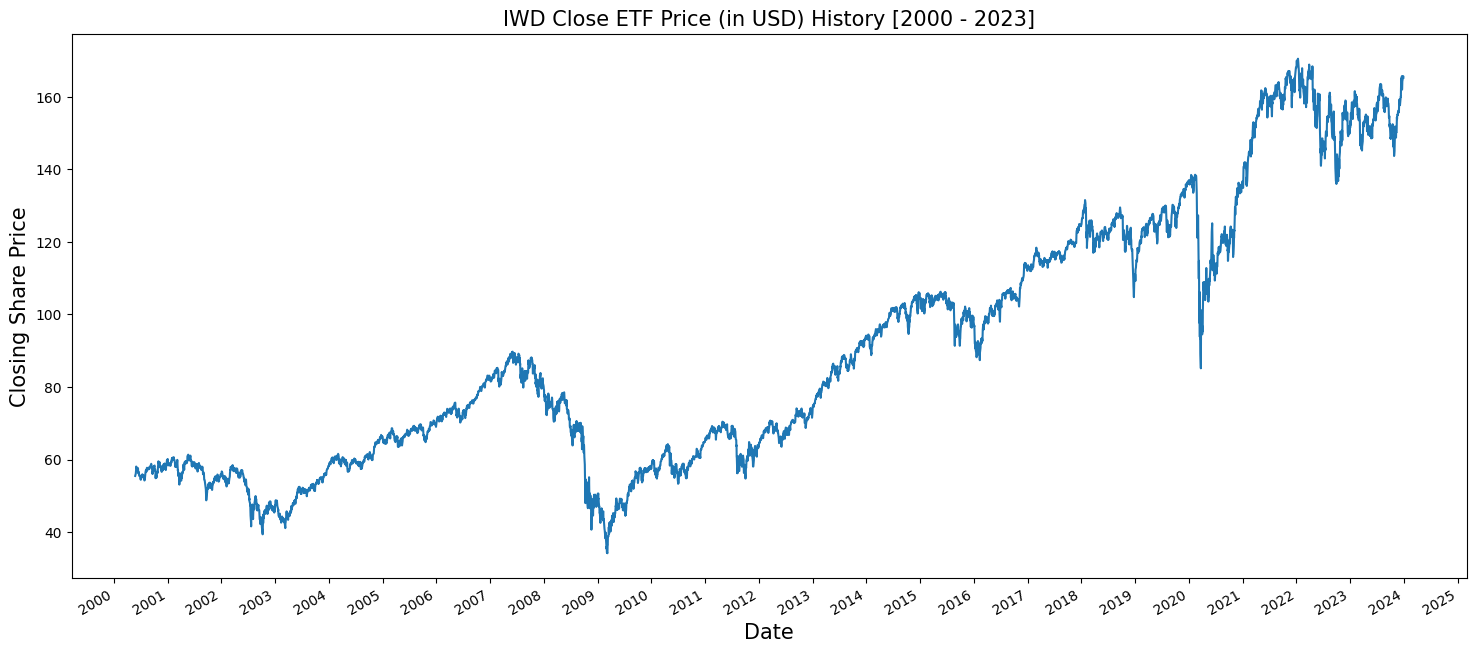

In [16]:
# IWD Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
#plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(iwd_df['Date'], iwd_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('IWD Close ETF Price (in USD) History [2000 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

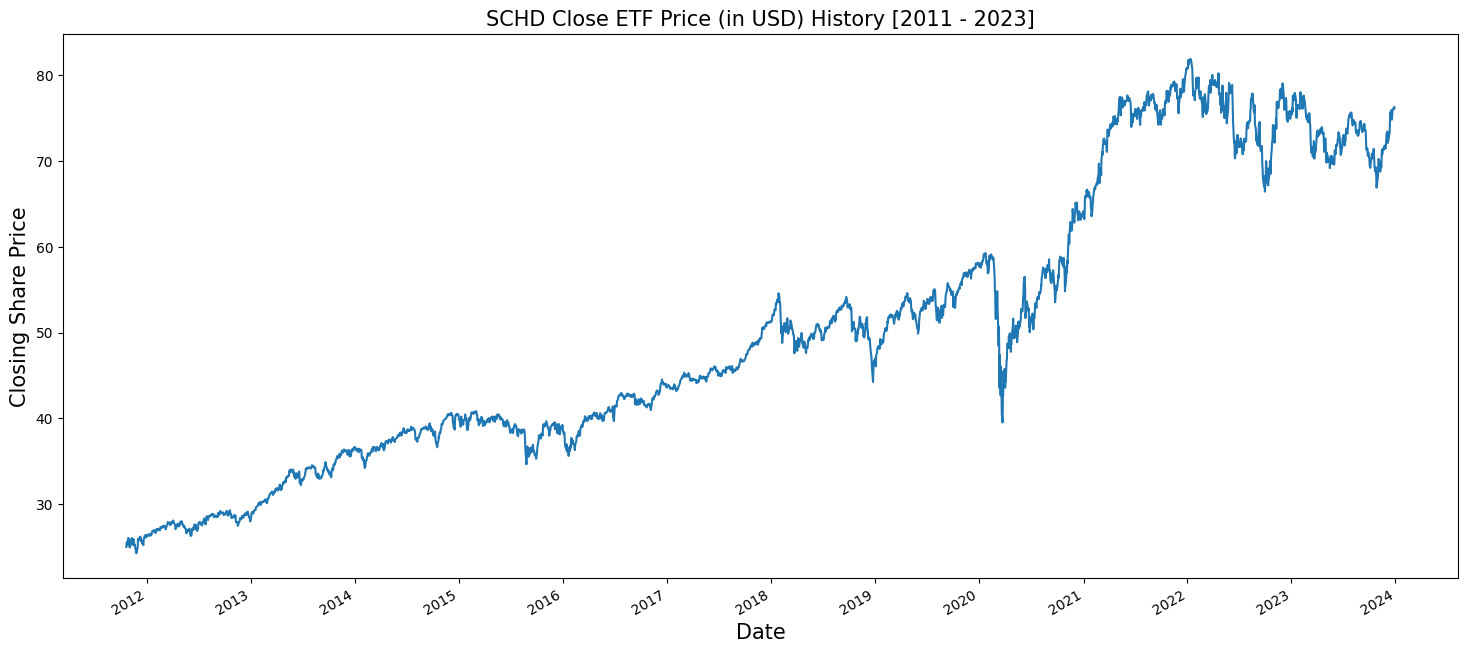

In [13]:
# SCHD Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(schd_df['Date'], schd_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('SCHD Close ETF Price (in USD) History [2011 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

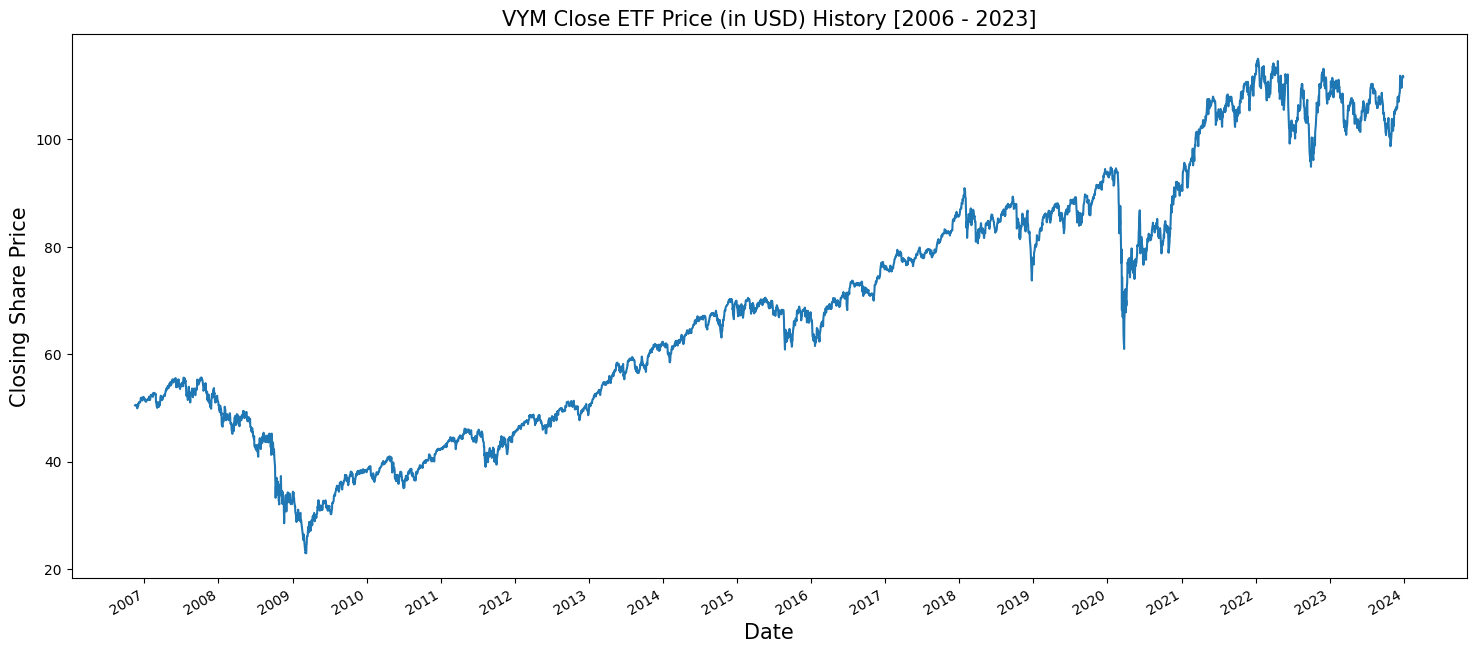

In [14]:
# VYM Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(vym_df['Date'], vym_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('VYM Close ETF Price (in USD) History [2006 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

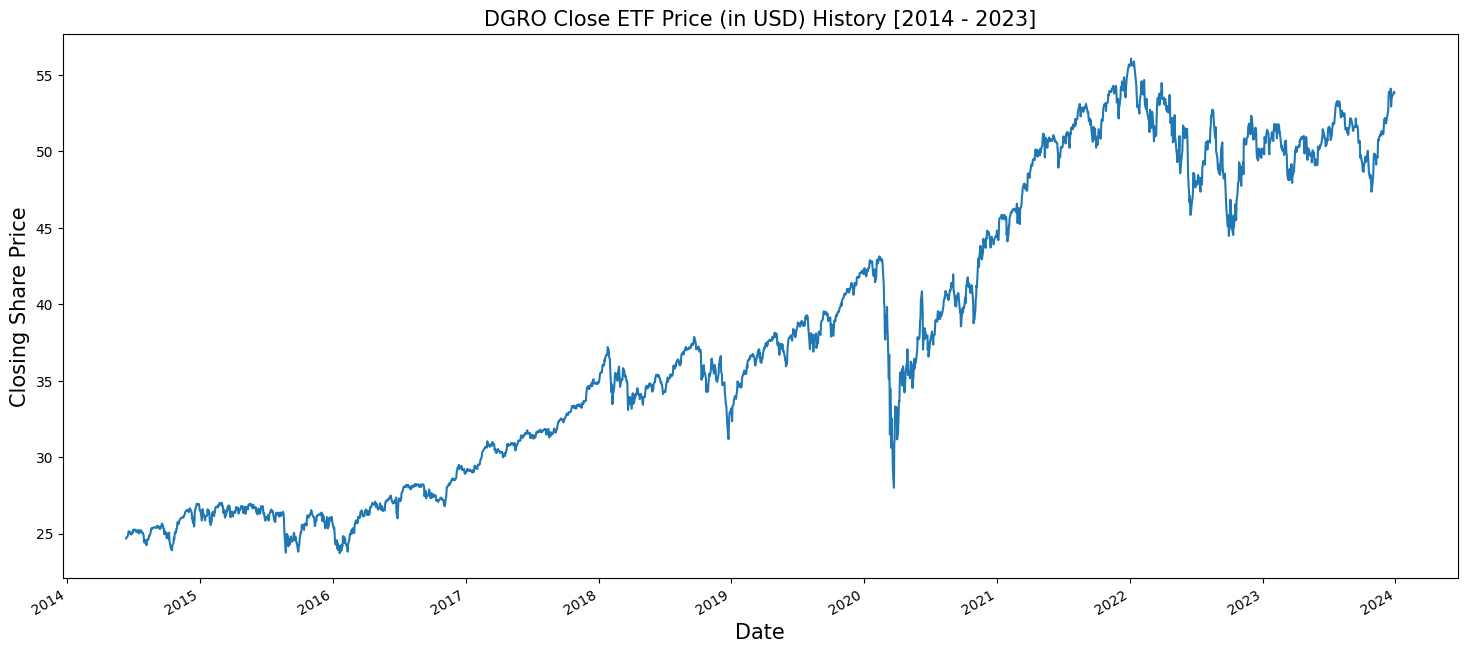

In [15]:
# DGRO Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(dgro_df['Date'], dgro_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('DGRO Close ETF Price (in USD) History [2014 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Step 2 - Creating & training the linear regression model

In [17]:
# Train test Split
# Split data into train and test set: 80% / 20%
train_iwd, test_iwd = train_test_split(iwd_df, test_size=0.20)
train_schd, test_schd = train_test_split(schd_df, test_size=0.20)
train_vym, test_vym = train_test_split(vym_df, test_size=0.20)
train_dgro, test_dgro = train_test_split(dgro_df, test_size=0.20)

In [18]:
# Reshape index column to 2D array for .fit() method
X_train_iwd = np.array(train_iwd.index).reshape(-1, 1)
X_train_schd = np.array(train_schd.index).reshape(-1, 1)
X_train_vym = np.array(train_vym.index).reshape(-1, 1)
X_train_dgro = np.array(train_dgro.index).reshape(-1, 1)

# Train Close column
y_train_iwd = train_iwd['Close']
y_train_schd = train_schd['Close']
y_train_vym = train_vym['Close']
y_train_dgro = train_dgro['Close']

In [19]:
# Create LinearRegression Object
iwd_model = LinearRegression()
schd_model = LinearRegression()
vym_model = LinearRegression()
dgro_model = LinearRegression()

In [20]:
# Fit linear model using the train data set for iwd
iwd_model.fit(X_train_iwd, y_train_iwd)

LinearRegression()

In [21]:
# Fit linear model using the train data set for schd
schd_model.fit(X_train_schd, y_train_schd)

LinearRegression()

In [22]:
# Fit linear model using the train data set for vym
vym_model.fit(X_train_vym, y_train_vym)

LinearRegression()

In [23]:
# Fit linear model using the train data set for dgro
dgro_model.fit(X_train_dgro, y_train_dgro)

LinearRegression()

# Step 3 - Model Evaluation

Interpreting the coefficients:<br />

1. The __slope__ coefficient tells us that with a 1 unit increase in date the closing price increases by x decimal result<br />
2. The __intercept__ coefficient is the price at wich the closing price measurement started, the ETF price value at date zero

In [24]:
# The coefficient
print('IWD Model Slope: ', np.asscalar(np.squeeze(iwd_model.coef_)))
# The Intercept
print('IWD Model Intercept: ', iwd_model.intercept_)

IWD Model Slope:  0.01827203197453883
IWD Model Intercept:  36.10283811351439


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/3860422573.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('IWD Model Slope: ', np.asscalar(np.squeeze(iwd_model.coef_)))


In [25]:
# The coefficient
print('SCHD Model Slope: ', np.asscalar(np.squeeze(schd_model.coef_)))
# The Intercept
print('SCHD Model Intercept: ', schd_model.intercept_)

SCHD Model Slope:  0.017350871593008677
SCHD Model Intercept:  23.54117431332532


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/3344663410.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('SCHD Model Slope: ', np.asscalar(np.squeeze(schd_model.coef_)))


In [26]:
# The coefficient
print('VYM Model Slope: ', np.asscalar(np.squeeze(vym_model.coef_)))
# The Intercept
print('VYM Model Intercept: ', vym_model.intercept_)

VYM Model Slope:  0.017824498436160494
VYM Model Intercept:  30.42740208287666


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/2329353671.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('VYM Model Slope: ', np.asscalar(np.squeeze(vym_model.coef_)))


In [27]:
# The coefficient
print('DGRO Model Slope: ', np.asscalar(np.squeeze(dgro_model.coef_)))
# The Intercept
print('DGRO Model Intercept: ', dgro_model.intercept_)

DGRO Model Slope:  0.013463407675197
DGRO Model Intercept:  21.835254708100845


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/531641698.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('DGRO Model Slope: ', np.asscalar(np.squeeze(dgro_model.coef_)))


# Step 4 - Graphing linear regression models (with training data)

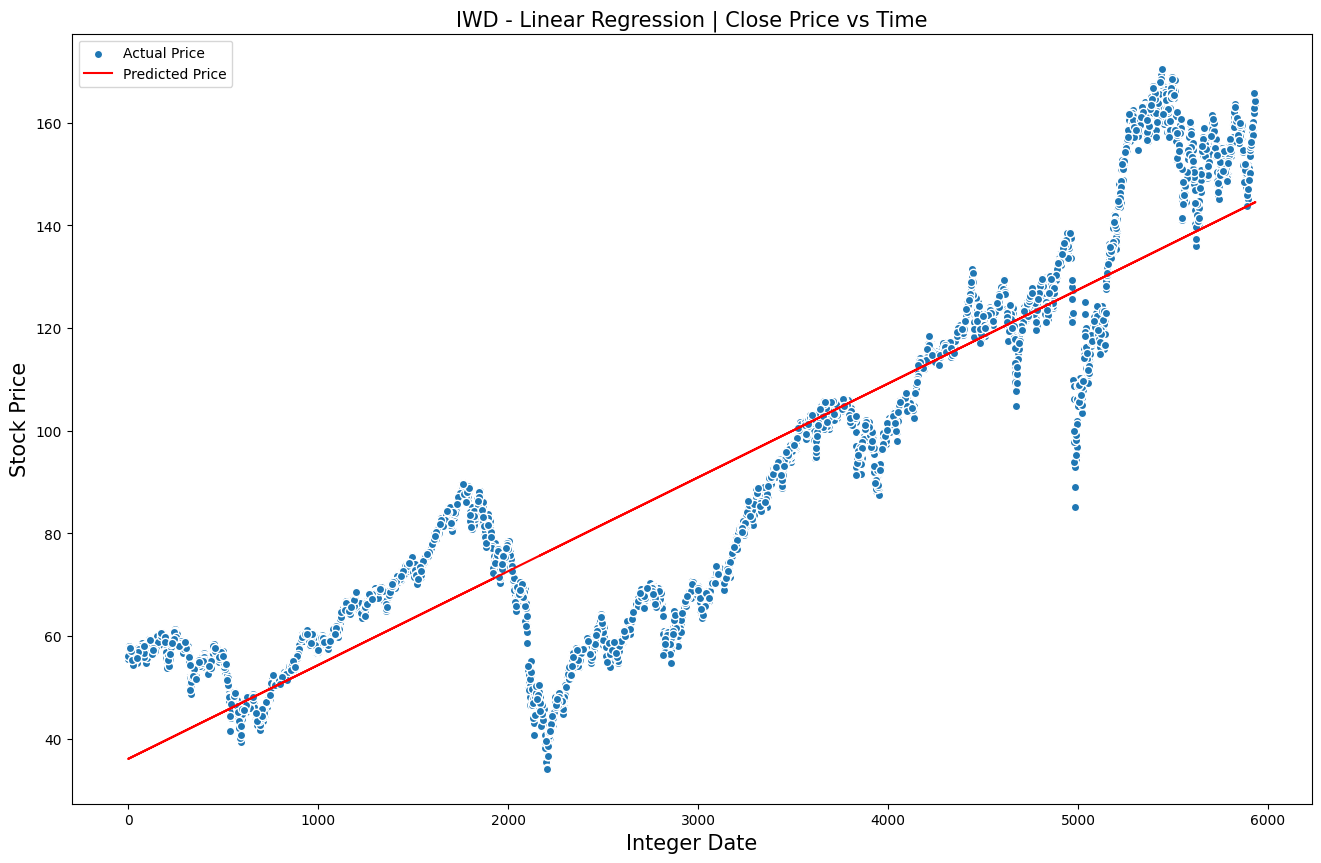

In [28]:
# Train set graph for IWD
plt.figure(1, figsize=(16,10))
plt.title('IWD - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_iwd, y_train_iwd, edgecolor='w', label='Actual Price')
plt.plot(X_train_iwd, iwd_model.predict(X_train_iwd), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

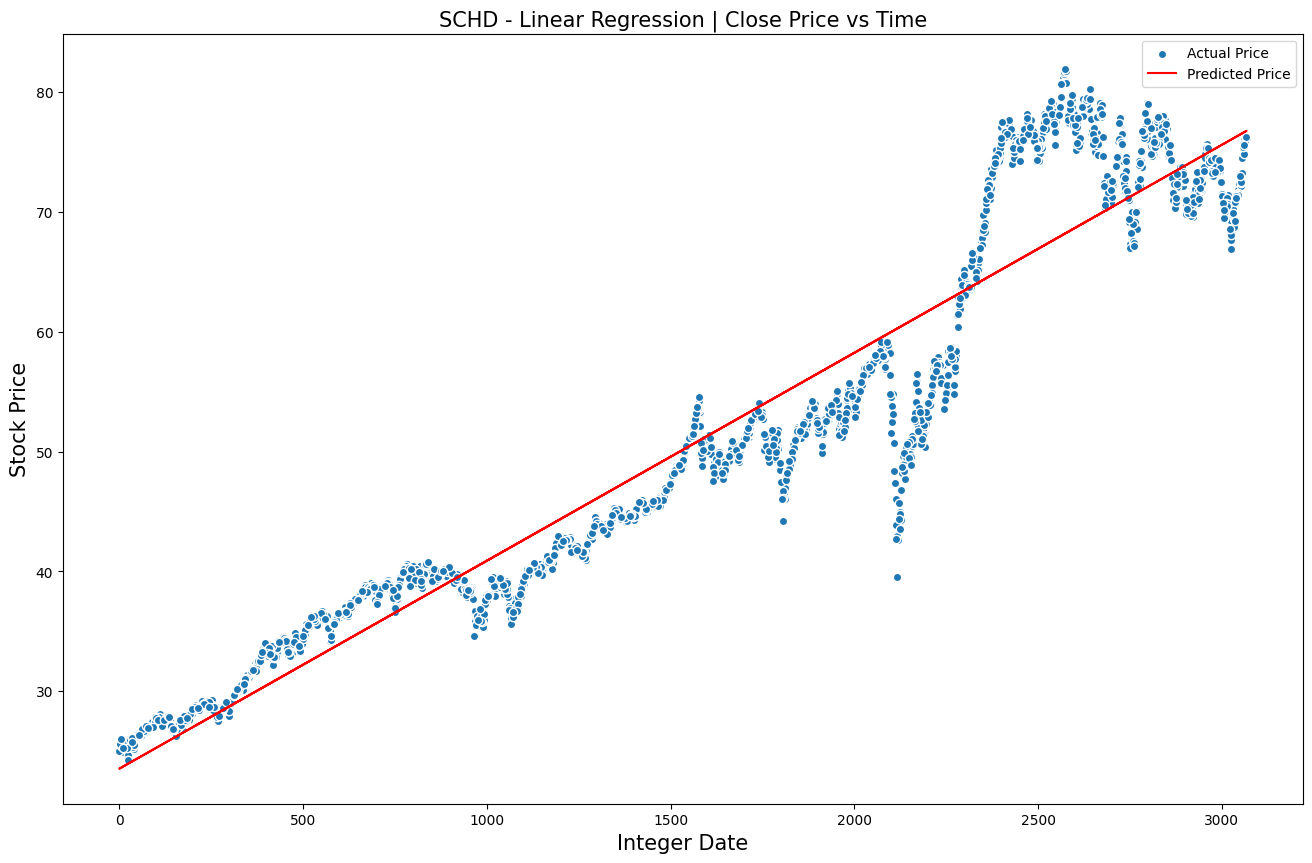

In [29]:
# Train set graph for SCHD
plt.figure(1, figsize=(16,10))
plt.title('SCHD - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_schd, y_train_schd, edgecolor='w', label='Actual Price')
plt.plot(X_train_schd, schd_model.predict(X_train_schd), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

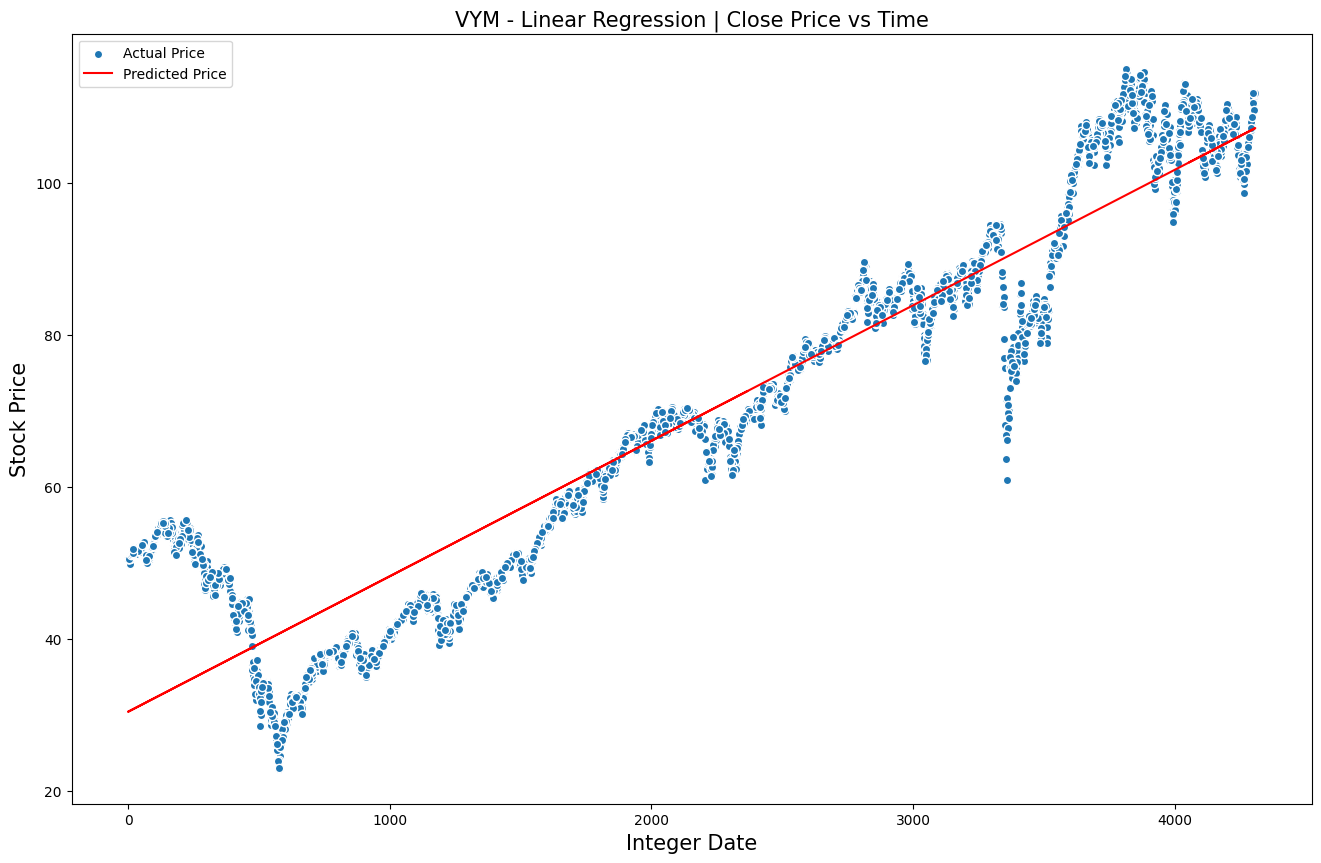

In [30]:
# Train set graph for VYM
plt.figure(1, figsize=(16,10))
plt.title('VYM - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_vym, y_train_vym, edgecolor='w', label='Actual Price')
plt.plot(X_train_vym, vym_model.predict(X_train_vym), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

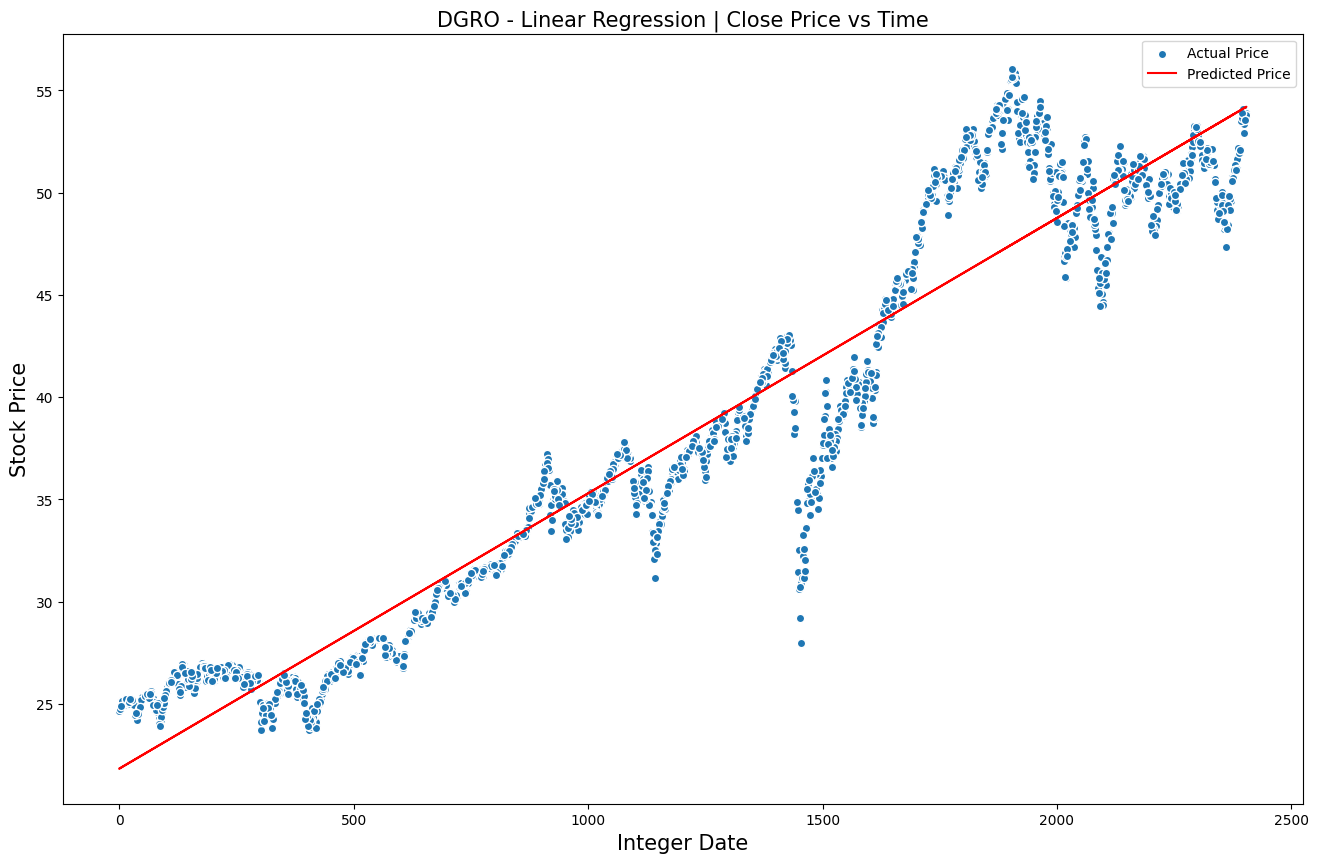

In [31]:
# Train set graph for DGRO
plt.figure(1, figsize=(16,10))
plt.title('DGRO - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_dgro, y_train_dgro, edgecolor='w', label='Actual Price')
plt.plot(X_train_dgro, dgro_model.predict(X_train_dgro), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

# Step 5 - Prediction from our model

In [32]:
# Create test arrays for IWD
X_test_iwd = np.array(test_iwd.index).reshape(-1, 1)
y_test_iwd = test_iwd['Close']

In [33]:
# Generate array with predicted values
y_pred_iwd = iwd_model.predict(X_test_iwd)

In [34]:
# Create test arrays for SCHD
X_test_schd = np.array(test_schd.index).reshape(-1, 1)
y_test_schd = test_schd['Close']

In [35]:
# Generate array with predicted values
y_pred_schd = schd_model.predict(X_test_schd)

In [36]:
# Create test arrays for VYM
X_test_vym = np.array(test_vym.index).reshape(-1, 1)
y_test_vym = test_vym['Close']

In [37]:
# Generate array with predicted values
y_pred_vym = vym_model.predict(X_test_vym)

In [38]:
# Create test arrays for VYM
X_test_dgro = np.array(test_dgro.index).reshape(-1, 1)
y_test_dgro = test_dgro['Close']

In [39]:
# Generate array with predicted values
y_pred_dgro = dgro_model.predict(X_test_dgro)

# Step 6 - Regression evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [40]:
# Get number of rows in data set for random sample
iwd_df.shape

(5936, 2)

In [41]:
# Get number of rows in data set for random sample
schd_df.shape

(3068, 2)

In [42]:
# Get number of rows in data set for random sample
vym_df.shape

(4308, 2)

In [43]:
# Get number of rows in data set for random sample
dgro_df.shape

(2405, 2)

In [44]:
# Generate 40 random numbers that will serve as 'bins' or segments
randints_iwd = np.random.randint(5936, size=40)
randints_schd = np.random.randint(3068, size=40)
randints_vym = np.random.randint(4308, size=40)
randints_dgro = np.random.randint(2405, size=40)

# Select row numbers == random numbers
iwd_df_sample = iwd_df[iwd_df.index.isin(randints_iwd)]
schd_df_sample = schd_df[schd_df.index.isin(randints_schd)]
vym_df_sample = vym_df[vym_df.index.isin(randints_vym)]
dgro_df_sample = dgro_df[dgro_df.index.isin(randints_dgro)]

In [45]:
iwd_df_sample.head()
#schd_df_sample.head()
#vym_df_sample.head()
#dgro_df_sample.head()

Date      Close
59  2000-08-21  57.531250
198 2001-03-12  56.910000
260 2001-06-08  59.919998
261 2001-06-11  59.660000
332 2001-09-26  50.590000

### Comparison bar charts - predicted price vs. actual price in randomized samples

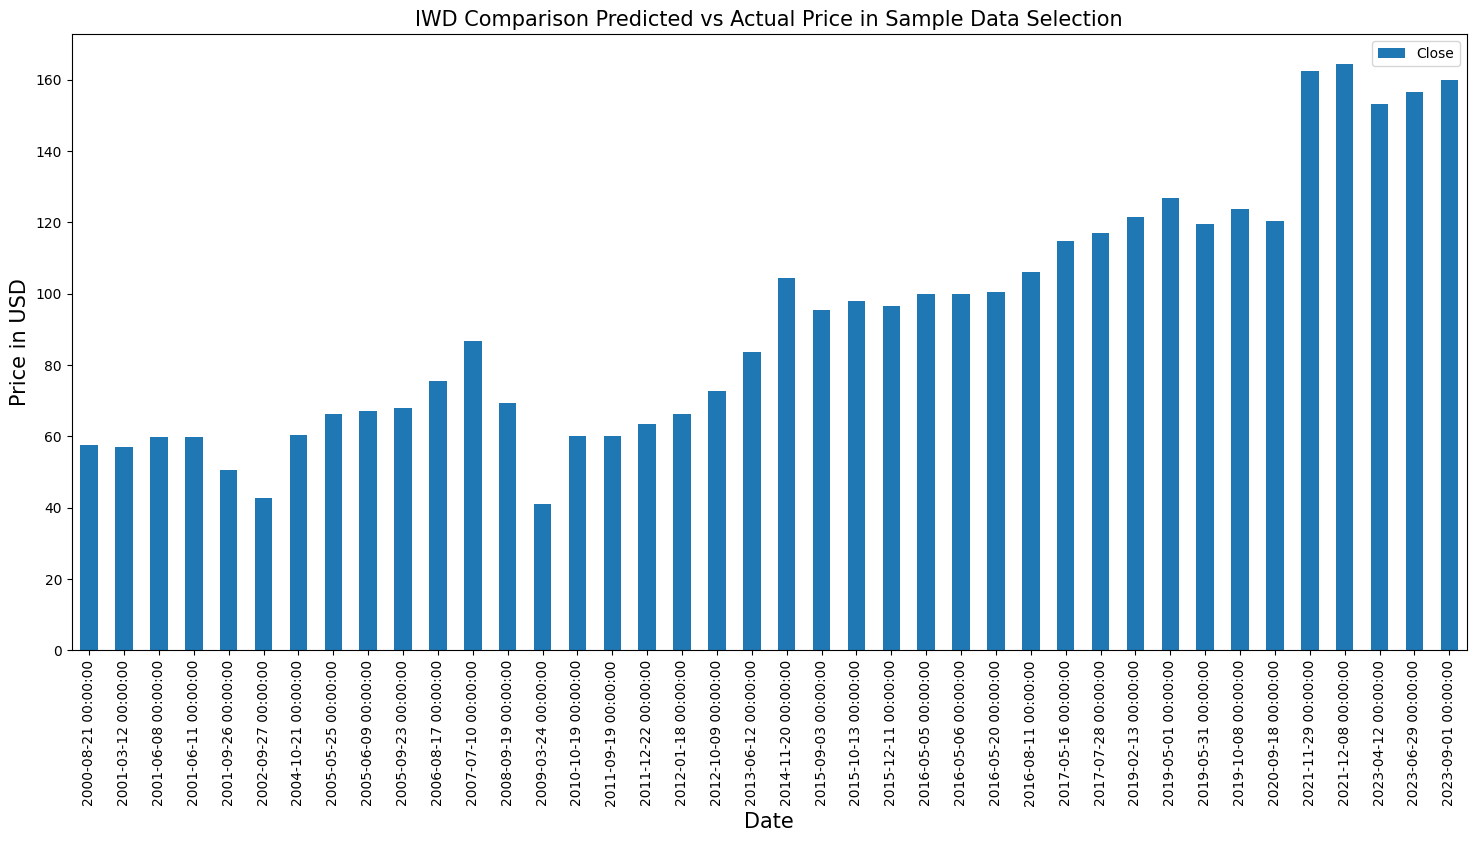

In [46]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
iwd_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('IWD Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

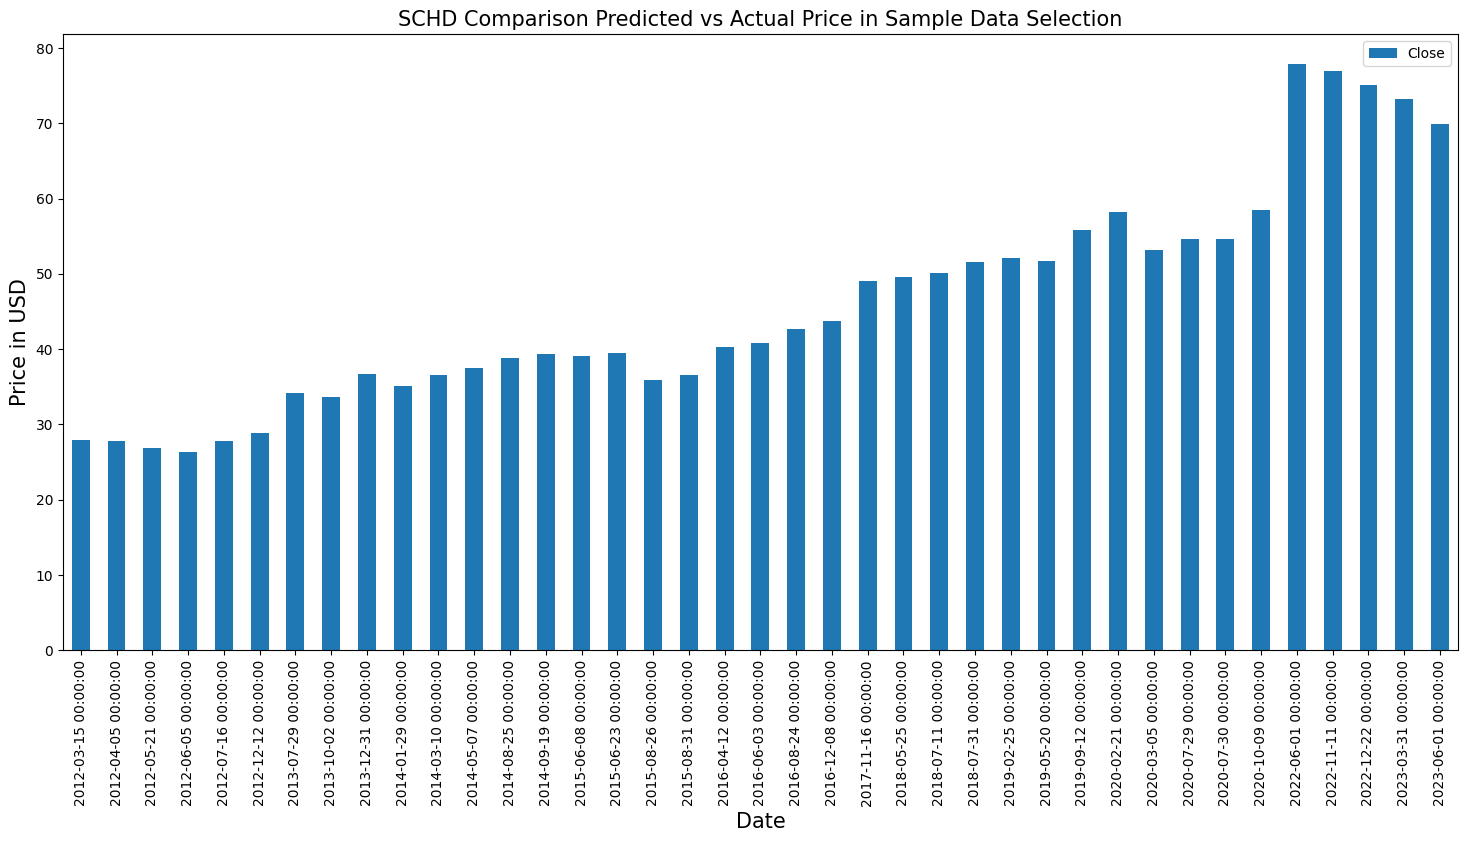

In [47]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
schd_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('SCHD Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

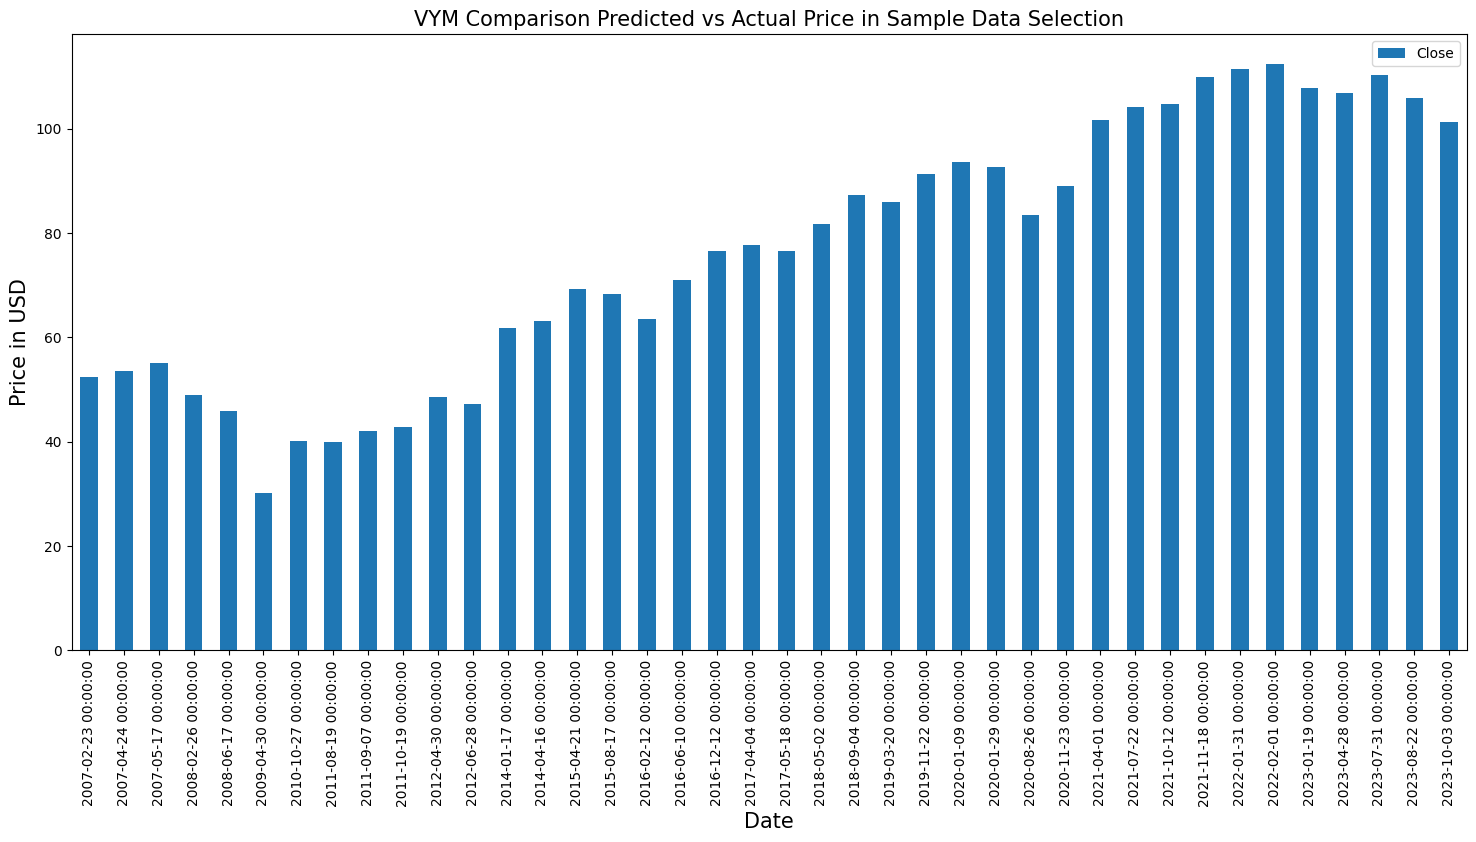

In [48]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
vym_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('VYM Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

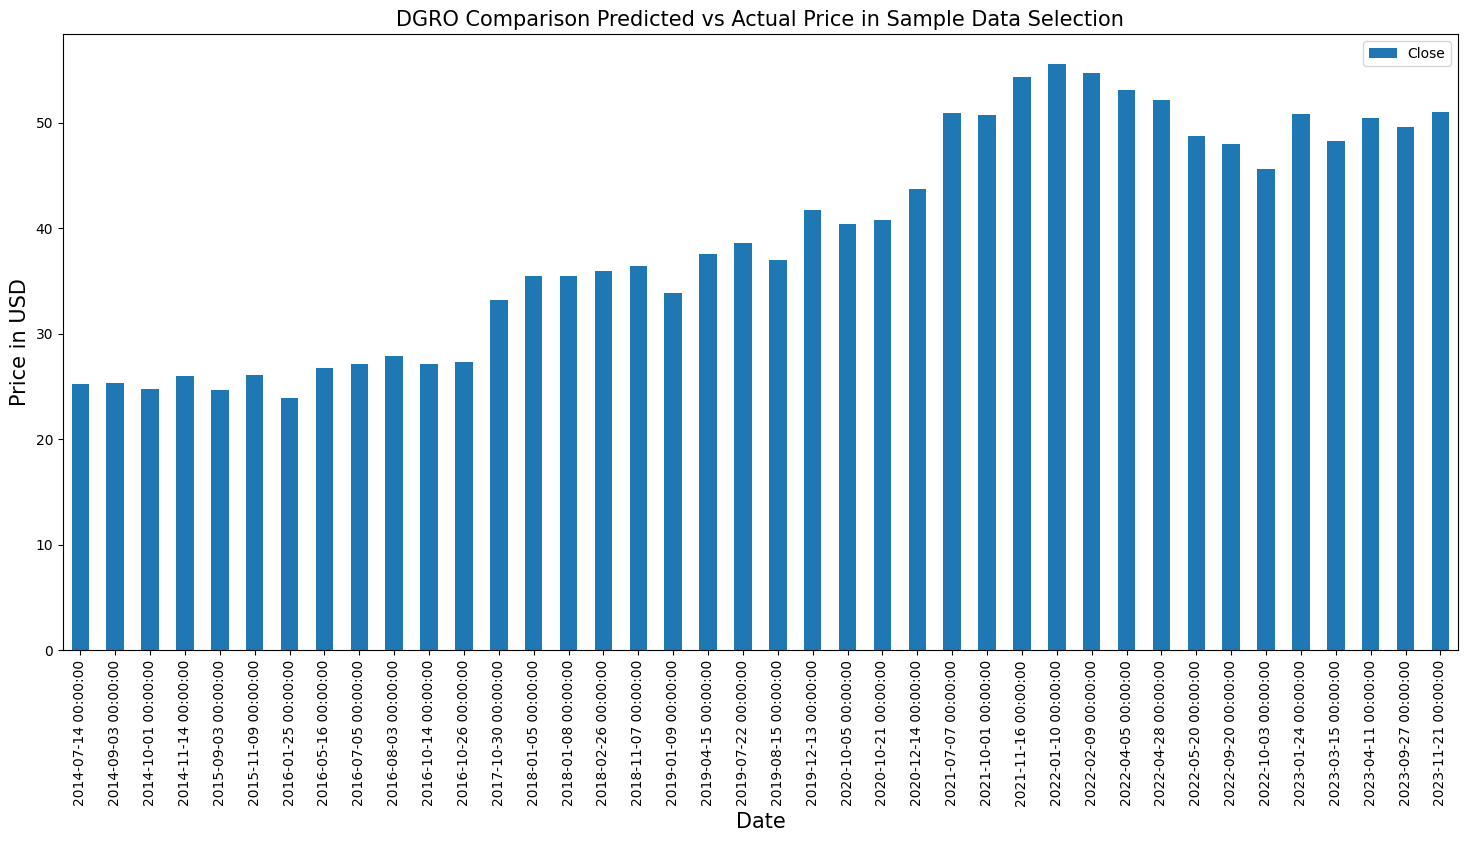

In [49]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
dgro_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('DGRO Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

We can see some larger variations between predicted and actual values in the random sample, but our models still point towards increasing prices with respect to time.

# Step 7 - Linear regression scatterplots (price vs time) with test data

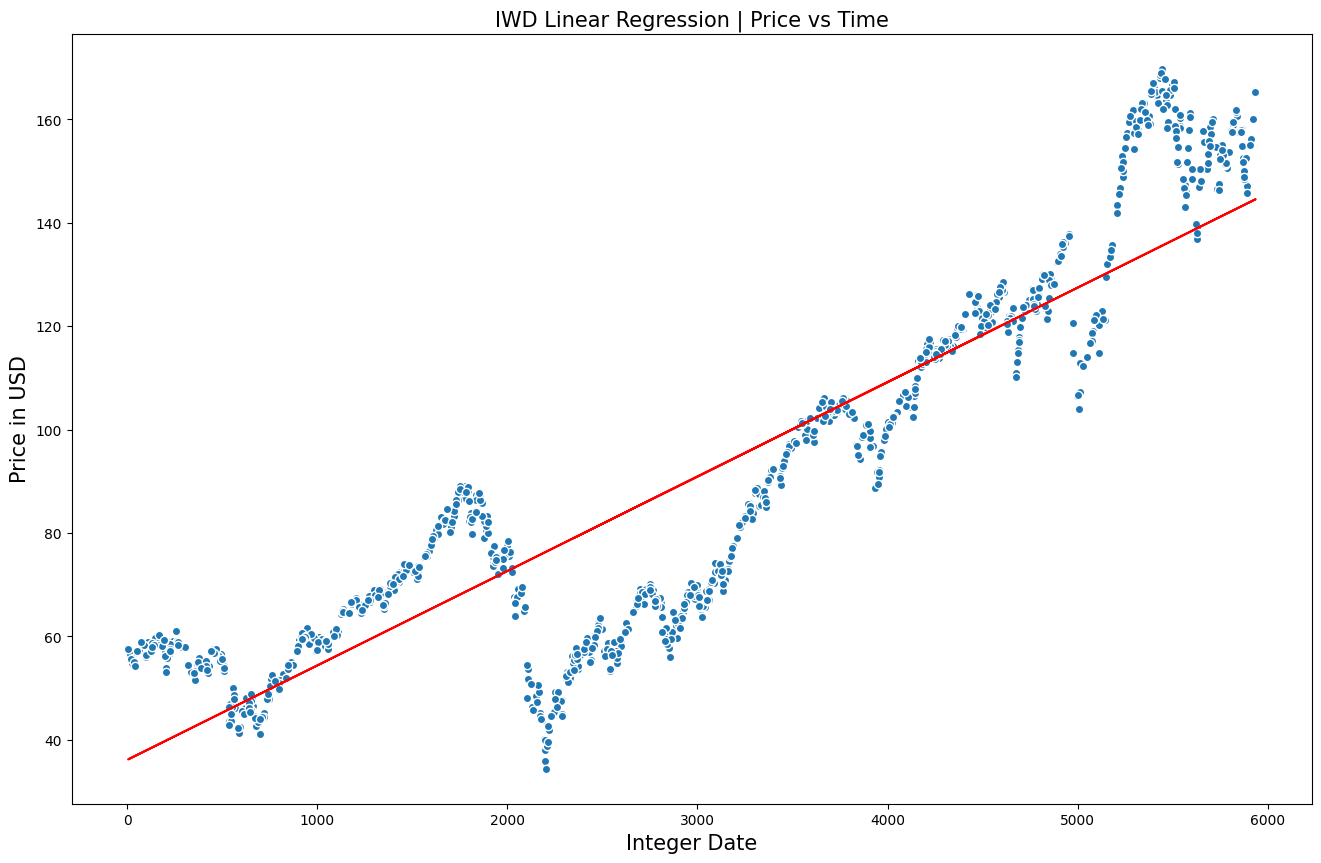

In [50]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('IWD Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_iwd, iwd_model.predict(X_test_iwd), color='r', label='Predicted Price')
plt.scatter(X_test_iwd, y_test_iwd, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

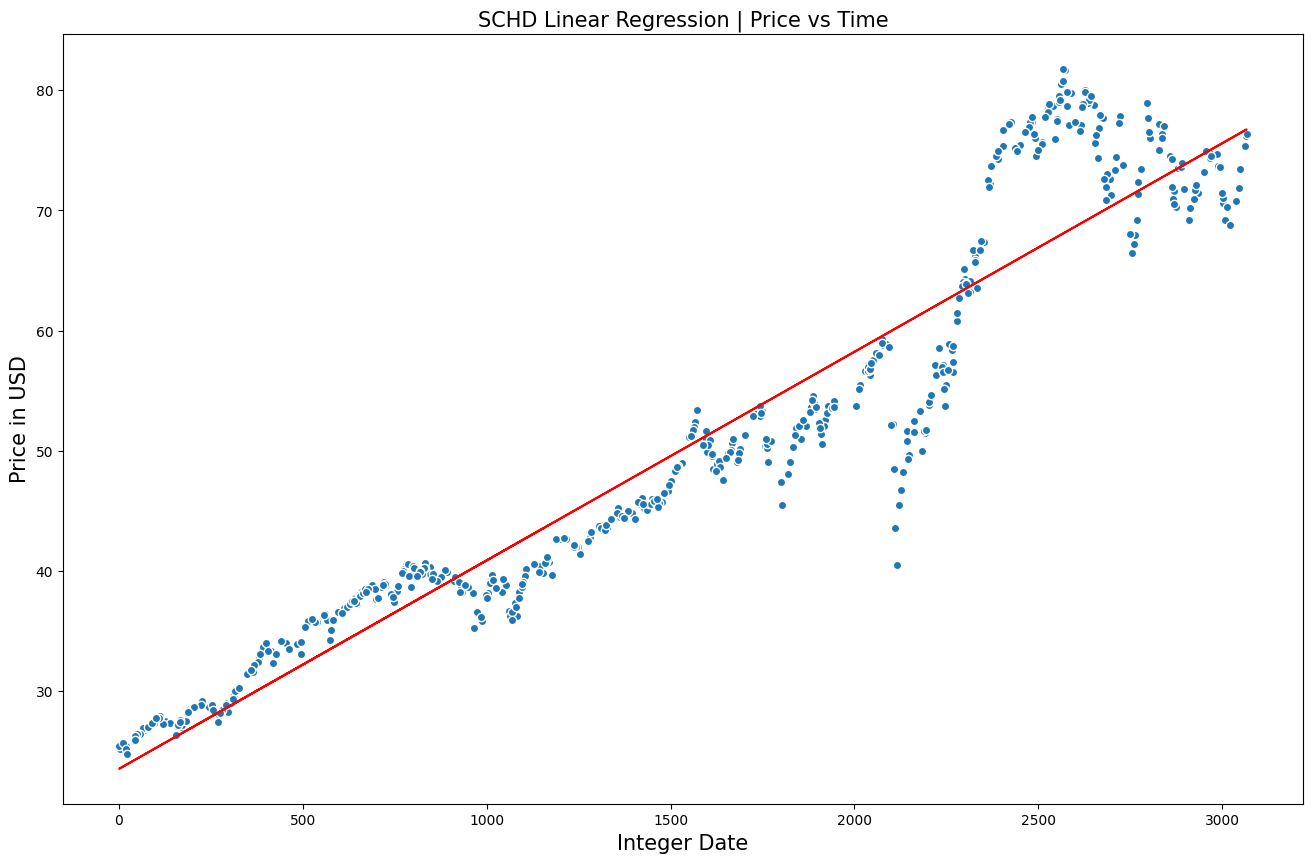

In [51]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('SCHD Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_schd, schd_model.predict(X_test_schd), color='r', label='Predicted Price')
plt.scatter(X_test_schd, y_test_schd, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

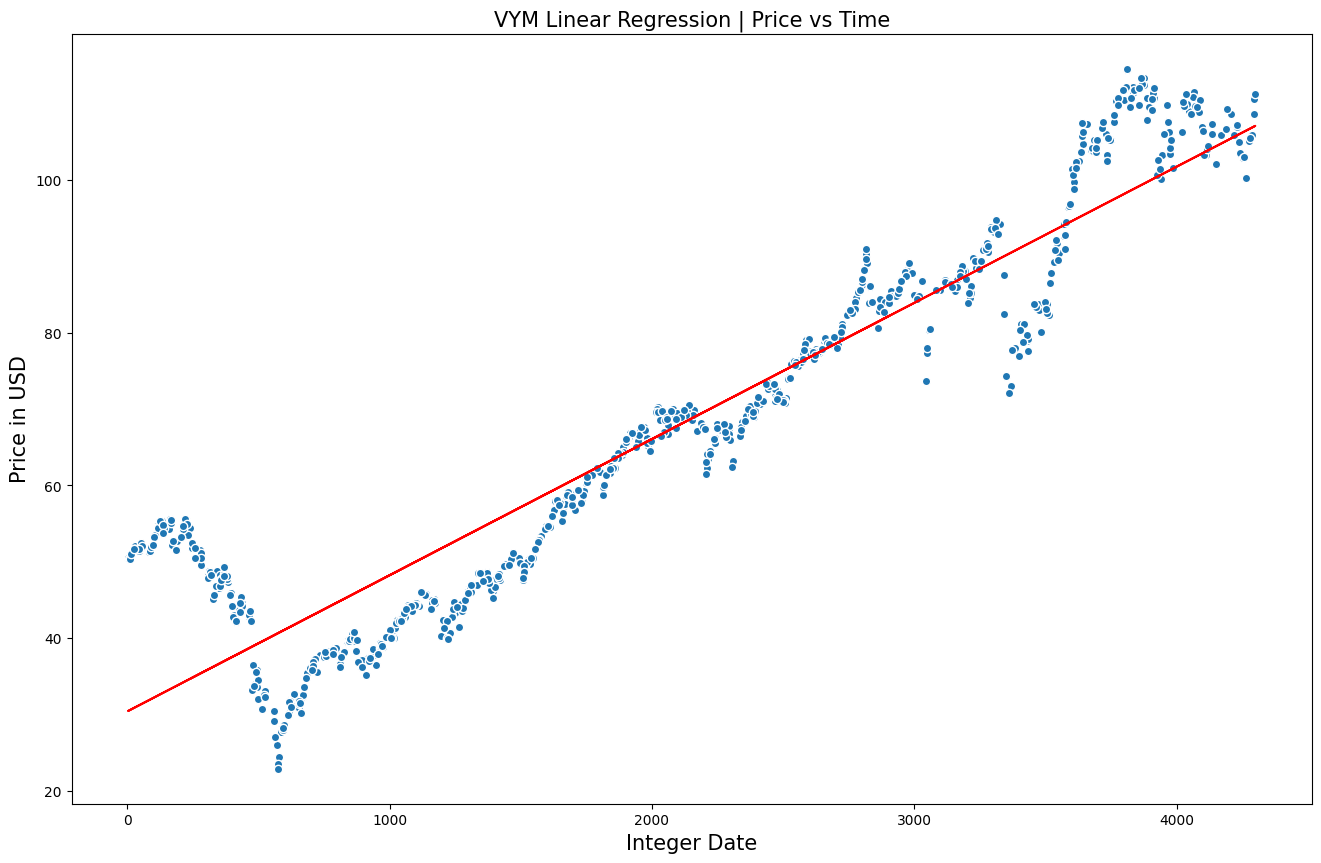

In [52]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('VYM Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_vym, vym_model.predict(X_test_vym), color='r', label='Predicted Price')
plt.scatter(X_test_vym, y_test_vym, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

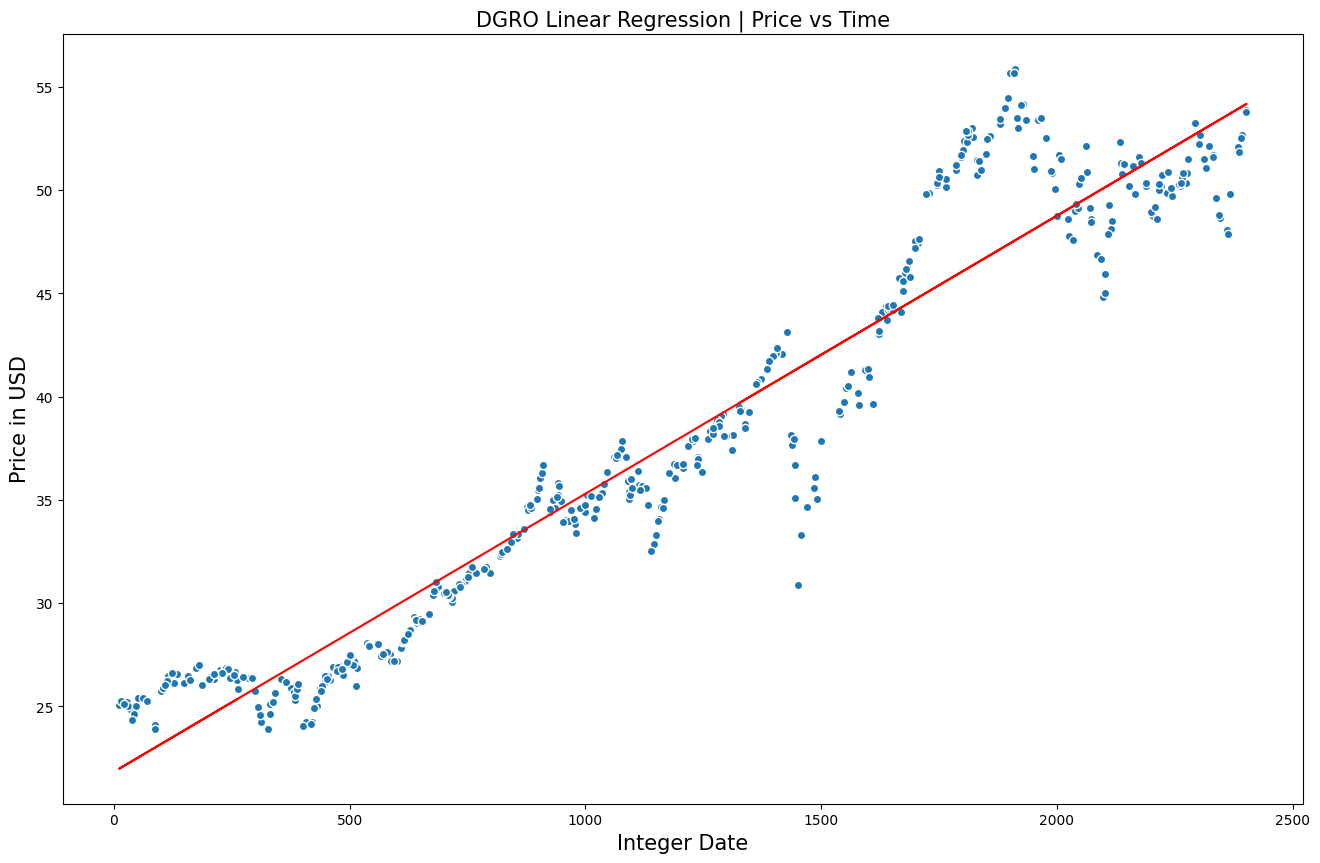

In [53]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('DGRO Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_dgro, dgro_model.predict(X_test_dgro), color='r', label='Predicted Price')
plt.scatter(X_test_dgro, y_test_dgro, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

# Step 8 - Graphing 'predicted price vs actual price' scatterplots

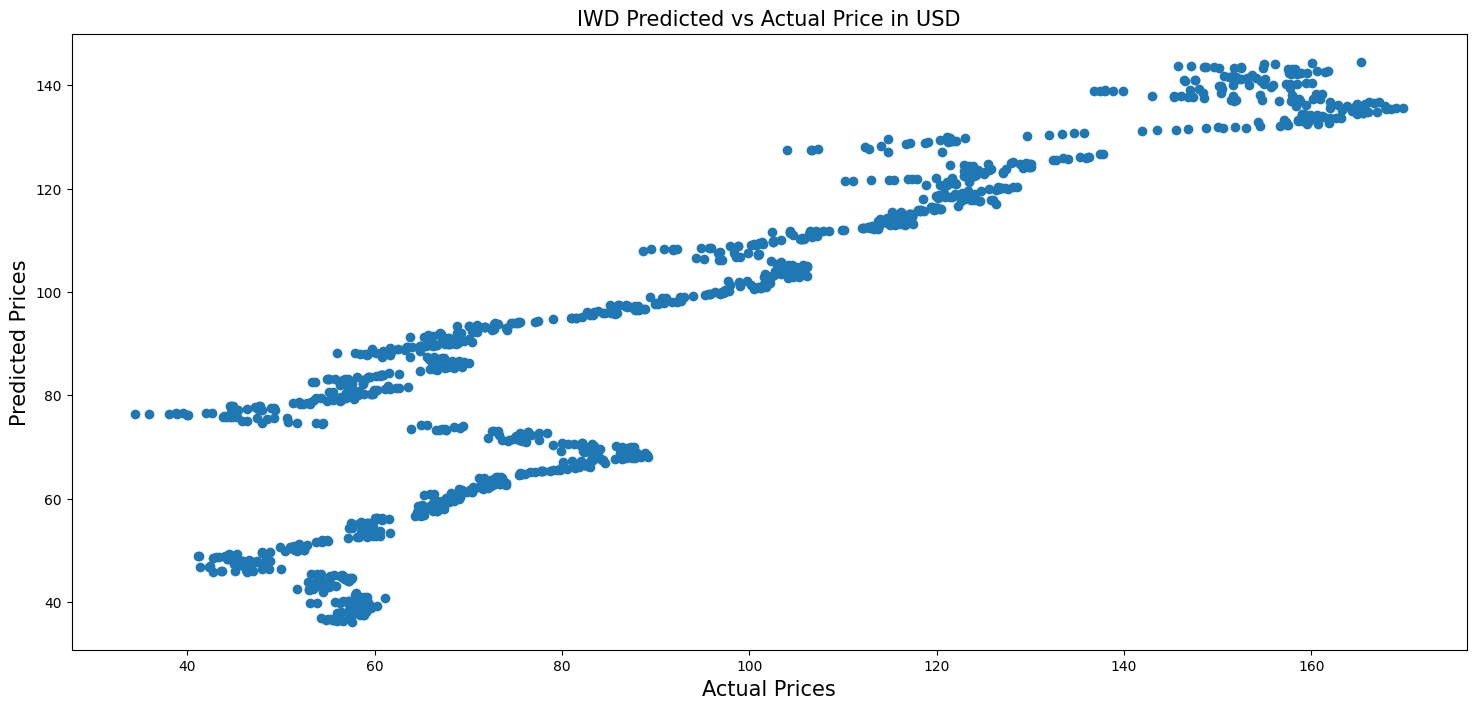

In [54]:
# Plot predicted vs actual prices
plt.scatter(y_test_iwd, y_pred_iwd)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('IWD Predicted vs Actual Price in USD', fontsize=15)
plt.show()

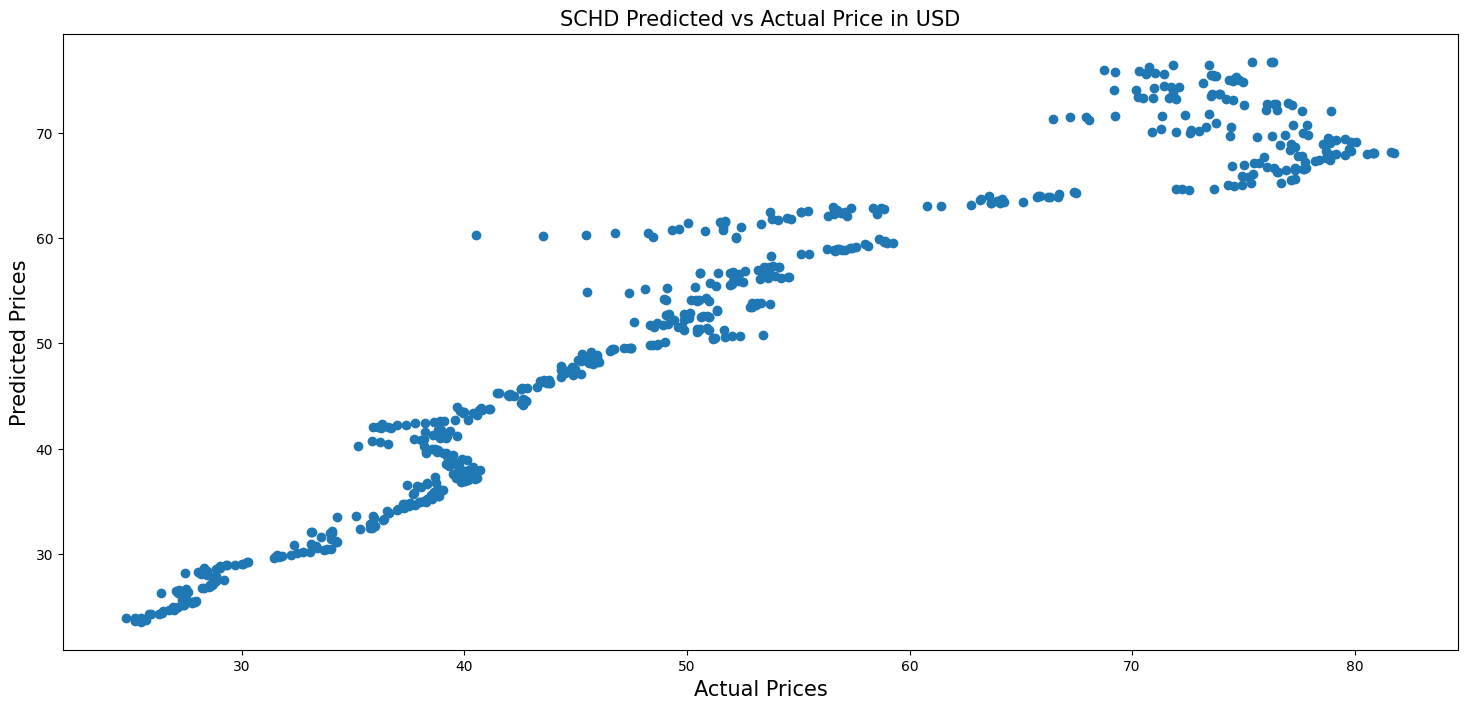

In [55]:
# Plot predicted vs actual prices
plt.scatter(y_test_schd, y_pred_schd)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('SCHD Predicted vs Actual Price in USD', fontsize=15)
plt.show()

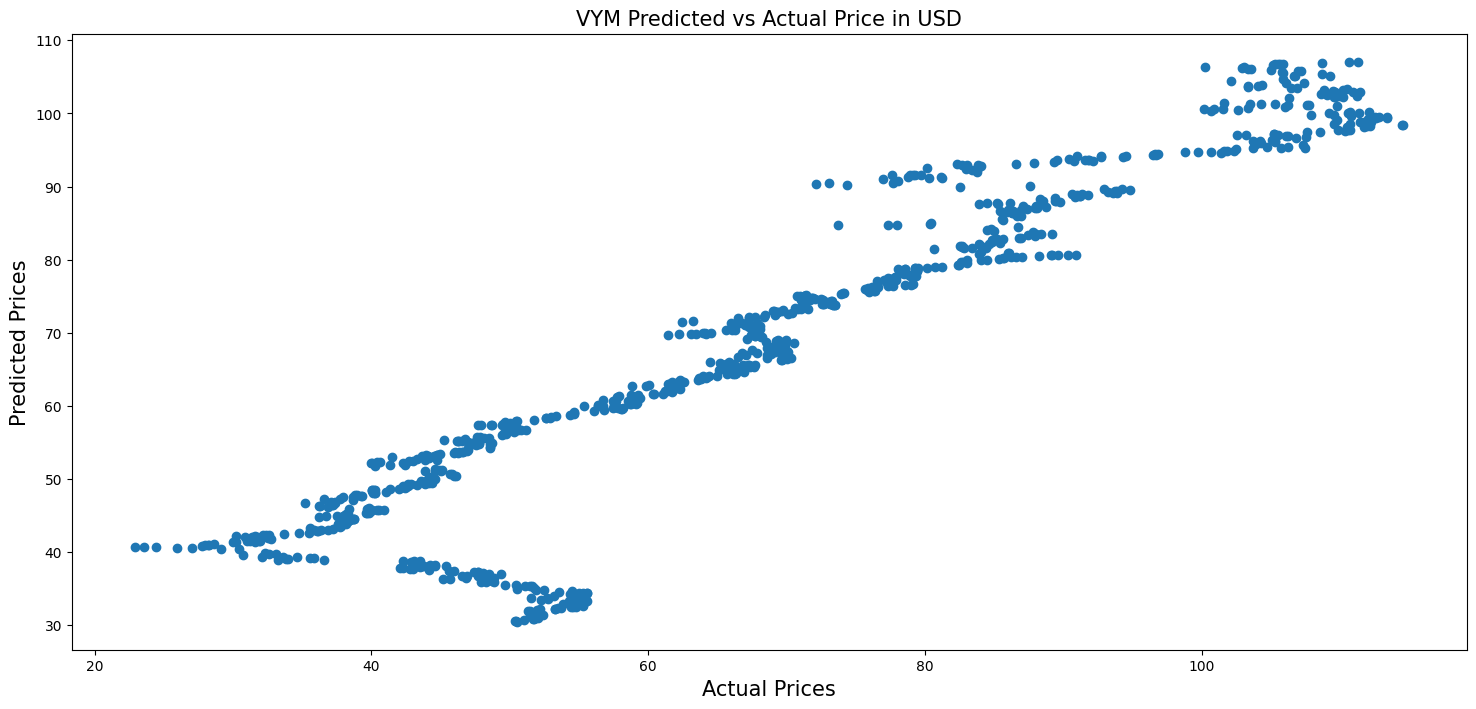

In [56]:
# Plot predicted vs actual prices
plt.scatter(y_test_vym, y_pred_vym)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('VYM Predicted vs Actual Price in USD', fontsize=15)
plt.show()

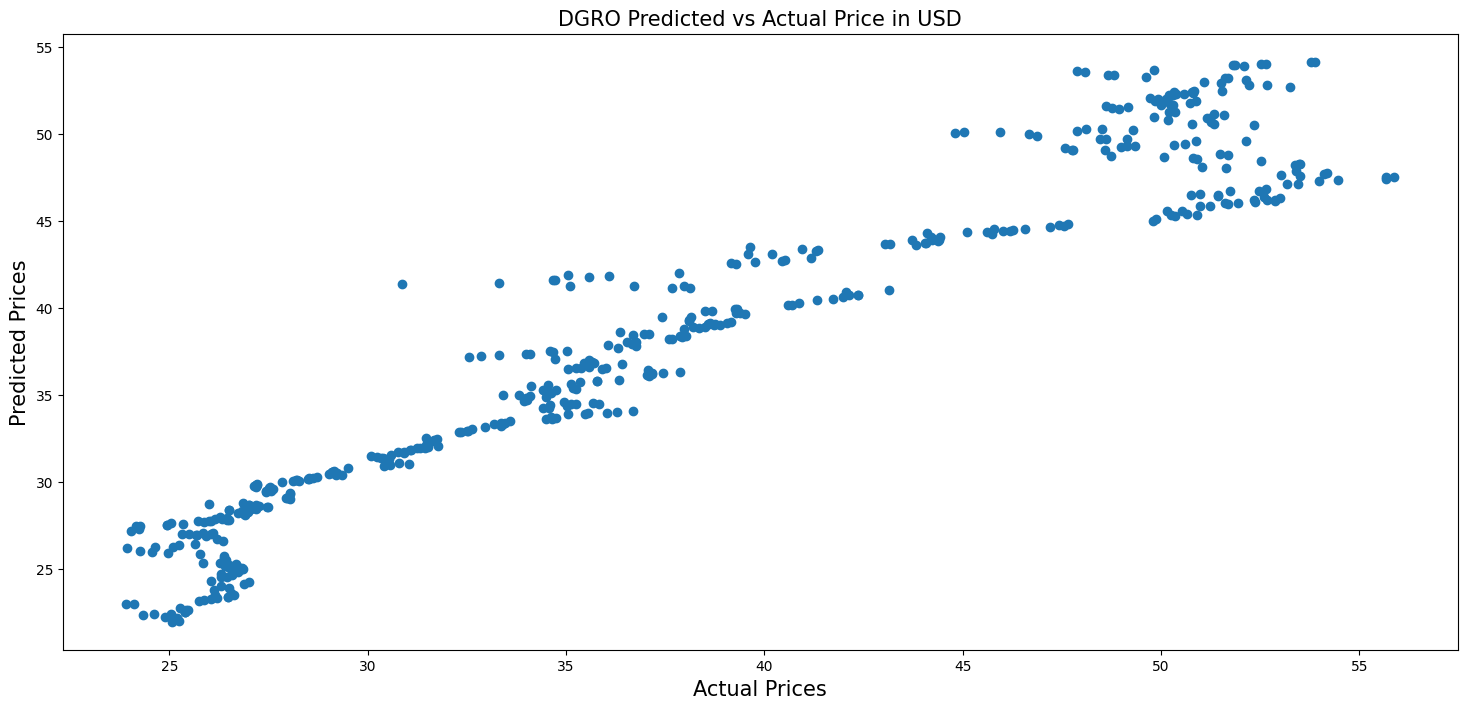

In [57]:
# Plot predicted vs actual prices
plt.scatter(y_test_dgro, y_pred_dgro)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('DGRO Predicted vs Actual Price in USD', fontsize=15)
plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good. Yet there are some areas where the models seem to be quite random and show no relationship between the predicted and actual value; for instance 'zigzag' sections where the margin of error or difference is too large (for example, data points where the actual price was 200 USD but it predicted a price of 150 USD where the difference is relatively large.

# Step 9 - Plot residual histogram

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. However, stock or ETF data in most cases will never be normally distributed.

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/4212144099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_iwd - y_pred_iwd), label='Residual Histogram & Distribution')


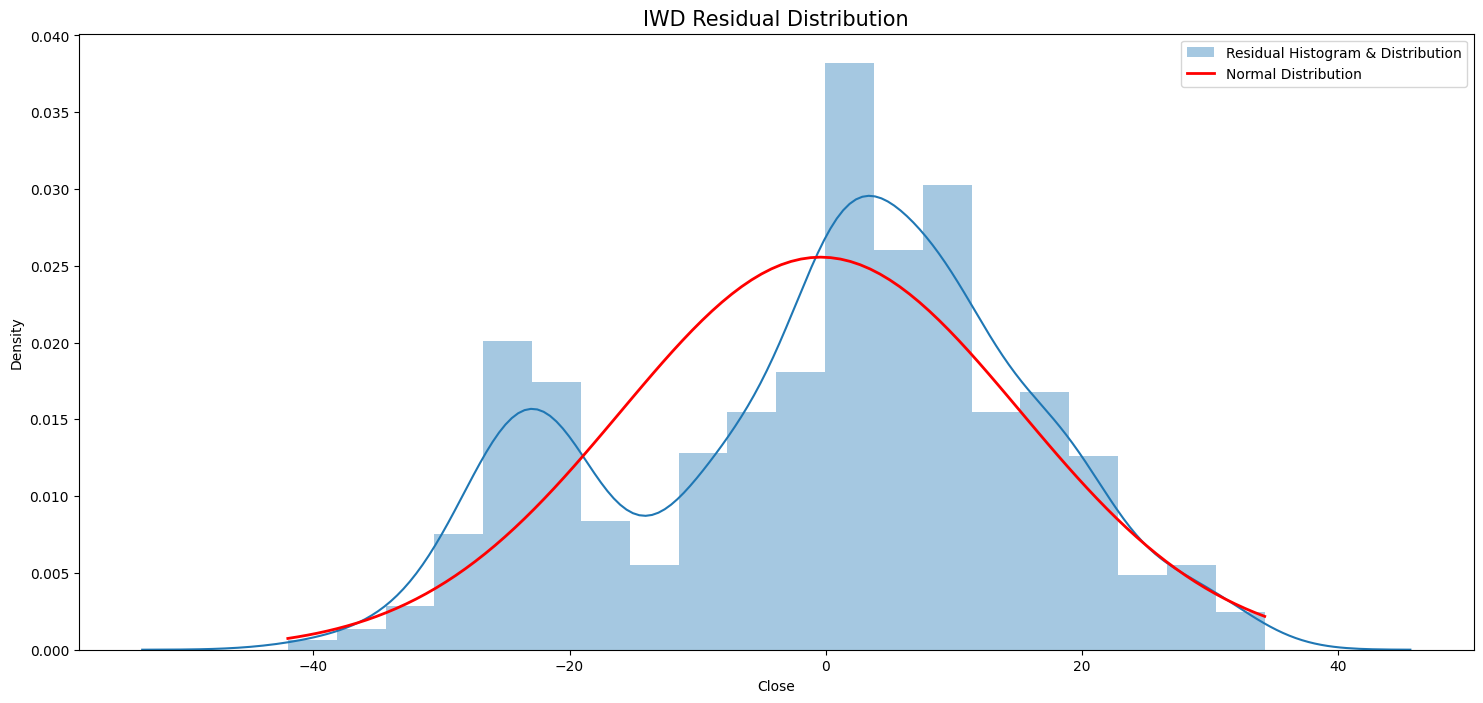

In [58]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_iwd - y_pred_iwd)
ax = sns.distplot((y_test_iwd - y_pred_iwd), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_iwd - y_pred_iwd), max(y_test_iwd - y_pred_iwd), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('IWD Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/2502359143.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_schd - y_pred_schd), label='Residual Histogram & Distribution')


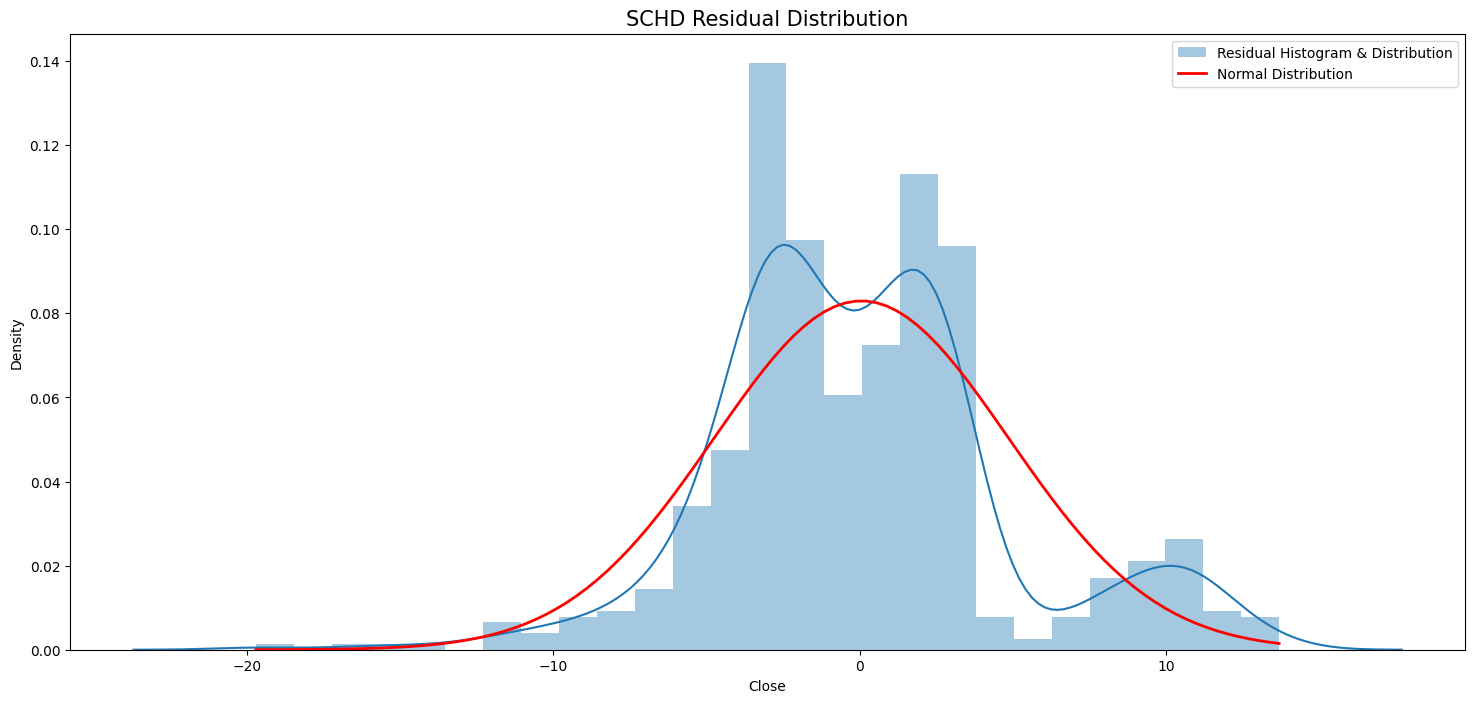

In [59]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_schd - y_pred_schd)
ax = sns.distplot((y_test_schd - y_pred_schd), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_schd - y_pred_schd), max(y_test_schd - y_pred_schd), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('SCHD Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/2422067681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_vym - y_pred_vym), label='Residual Histogram & Distribution')


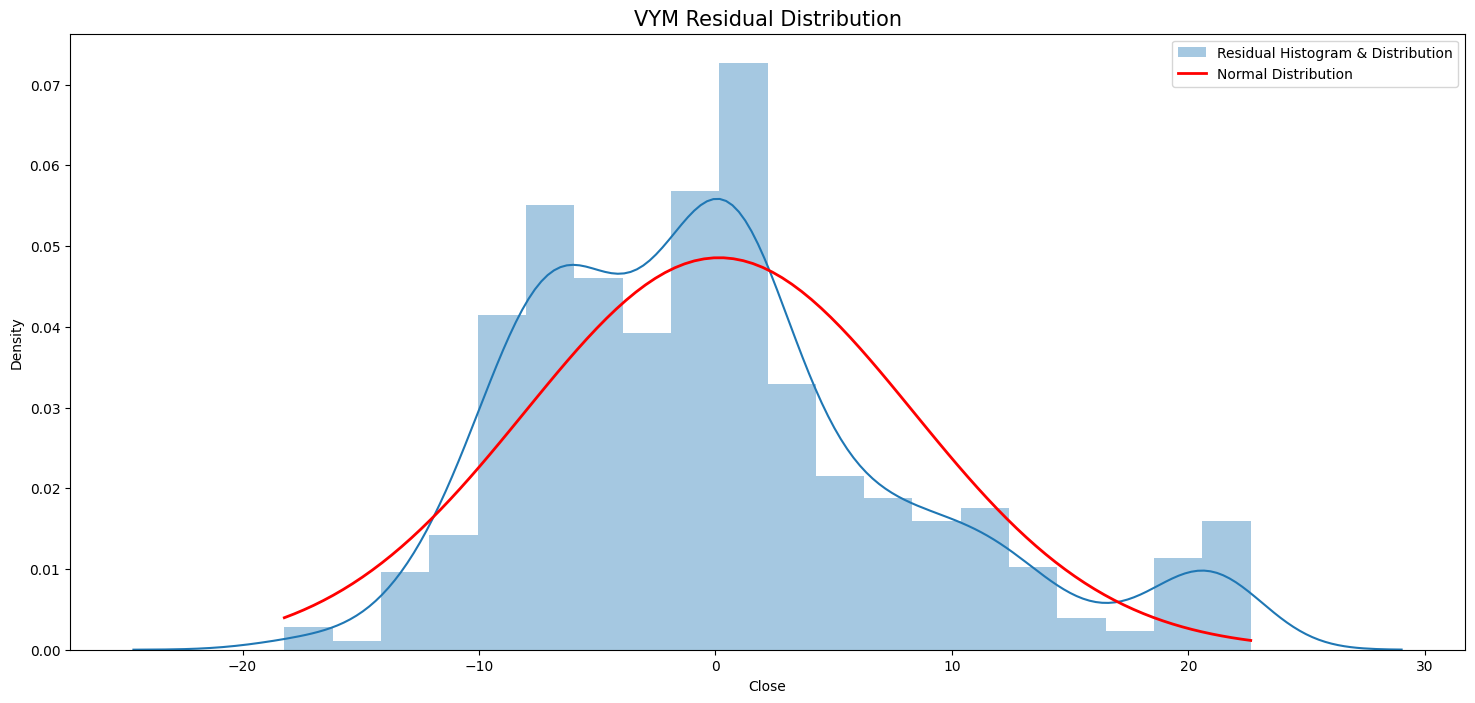

In [60]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_vym - y_pred_vym)
ax = sns.distplot((y_test_vym - y_pred_vym), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_vym - y_pred_vym), max(y_test_vym - y_pred_vym), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('VYM Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_2026/459340210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_dgro - y_pred_dgro), label='Residual Histogram & Distribution')


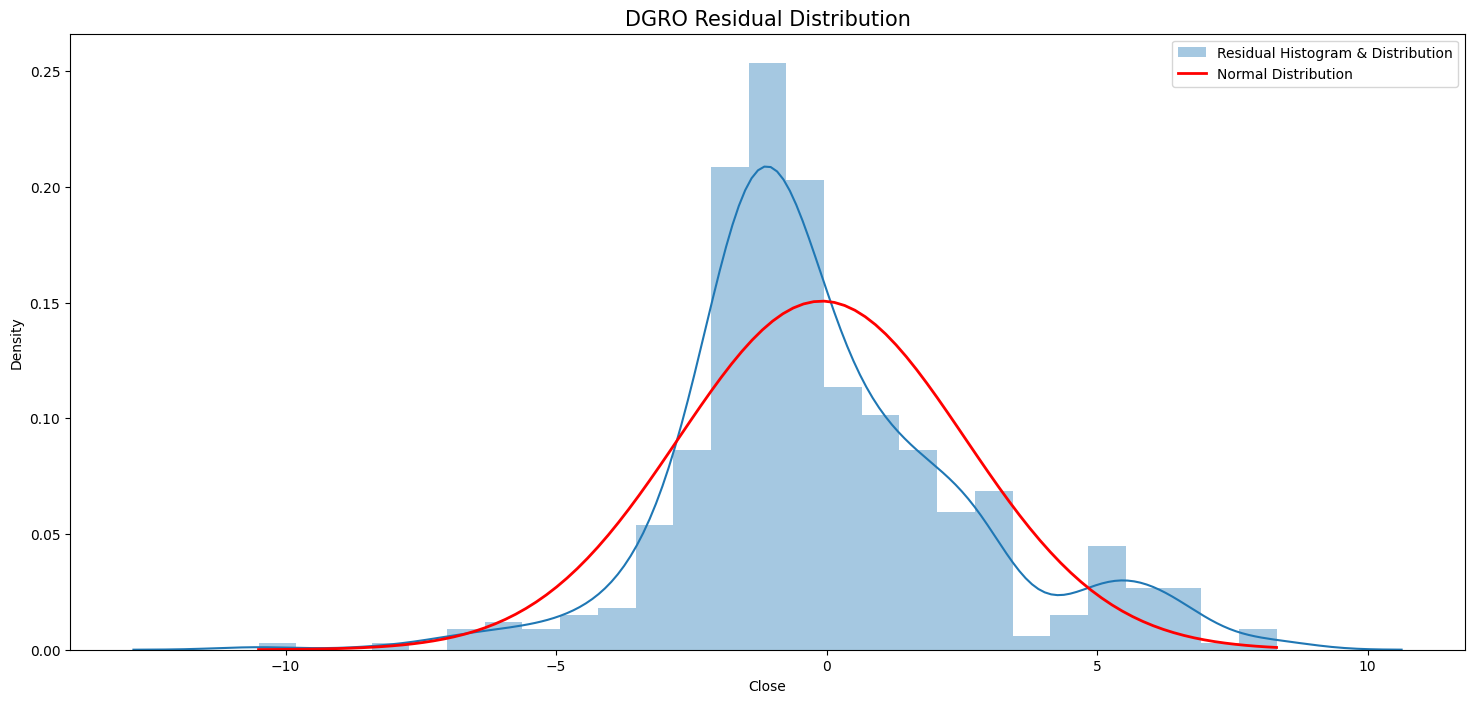

In [61]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_dgro - y_pred_dgro)
ax = sns.distplot((y_test_dgro - y_pred_dgro), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_dgro - y_pred_dgro), max(y_test_dgro - y_pred_dgro), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('DGRO Residual Distribution', fontsize=15)
plt.legend()
plt.show()

In [62]:
# Add new column for predictions to df
iwd_df['Prediction'] = iwd_model.predict(np.array(iwd_df.index).reshape(-1, 1))
schd_df['Prediction'] = schd_model.predict(np.array(schd_df.index).reshape(-1, 1))
vym_df['Prediction'] = vym_model.predict(np.array(vym_df.index).reshape(-1, 1))
dgro_df['Prediction'] = dgro_model.predict(np.array(dgro_df.index).reshape(-1, 1))

In [63]:
iwd_df.tail()
#schd_df.tail()
#vym_df.tail()
#dgro_df.tail()

Date       Close  Prediction
5931 2023-12-22  164.279999  144.474260
5932 2023-12-26  165.220001  144.492532
5933 2023-12-27  165.460007  144.510804
5934 2023-12-28  165.699997  144.529076
5935 2023-12-29  165.250000  144.547348

# Step 10 - Perform error evaluation metrics

An error metric is a way to quantify the performance of a model and provides a way for the forecaster to quantitatively compare different models. the following types of error are: <br />

1. __Mean Absolute Error (MAE)__: Is the absolute value of difference between observed data points vs. predicted points divided by the sample size <br />
2. __Mean Squared Error (MSE)__: Is the average squared difference between observed data points vs. predicted points <br />
3. __Root Mean Squared Error (RMSE)__: is the square root of the mean of the squared errors (MSE)

### Error evaluation for IWD

In [64]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_iwd, y_pred_iwd))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_iwd, y_pred_iwd))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_iwd, y_pred_iwd)))

Mean Absolute Error: 12.569202680575435
Mean Squared Error: 243.69244997499084
Root Mean Squared Error: 15.61065181134314


### Error evaluation for SCHD

In [65]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_schd, y_pred_schd))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_schd, y_pred_schd))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_schd, y_pred_schd)))

Mean Absolute Error: 3.647701352144238
Mean Squared Error: 23.12609030294834
Root Mean Squared Error: 4.808959378384095


### Error evaluation for VYM

In [66]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_vym, y_pred_vym))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_vym, y_pred_vym))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_vym, y_pred_vym)))

Mean Absolute Error: 6.289376005232494
Mean Squared Error: 67.52319399164082
Root Mean Squared Error: 8.21724978272176


### Error evaluation for DGRO

In [67]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dgro, y_pred_dgro))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dgro, y_pred_dgro))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dgro, y_pred_dgro)))

Mean Absolute Error: 2.0085295608142473
Mean Squared Error: 7.017570280829734
Root Mean Squared Error: 2.6490697010138735


# Step 11 - Perform accuracy evaluation metrics

To see how accurate our model is, we can calculate the __Coefficient of determination__, which describes the ratio between the total error and the error. It's value is between 0 and 1, with 1 meaning 100% of the error is accounted for by the model. <br />

1. The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.<br />
2. The explained variance score explains the dispersion of errors of a given dataset. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

### Accuracy for IWD

In [68]:
print('R2: ', metrics.r2_score(y_test_iwd, y_pred_iwd))

R2:  0.8041641194753542


In [69]:
explained_variance_score(y_test_iwd, y_pred_iwd)

0.8042941005584809

### Accuracy for SCHD

In [70]:
print('R2: ', metrics.r2_score(y_test_schd, y_pred_schd))

R2:  0.9098889089854479


In [71]:
explained_variance_score(y_test_schd, y_pred_schd)

0.9098987701757301

### Accuracy for VYM

In [72]:
print('R2: ', metrics.r2_score(y_test_vym, y_pred_vym))

R2:  0.8772070939907487


In [73]:
explained_variance_score(y_test_vym, y_pred_vym)

0.877251965687143

### Accuracy for DGRO

In [74]:
print('R2: ', metrics.r2_score(y_test_dgro, y_pred_dgro))

R2:  0.9257607300070902


In [75]:
explained_variance_score(y_test_dgro, y_pred_dgro)

0.9258428445090063

# Step 12 - Results

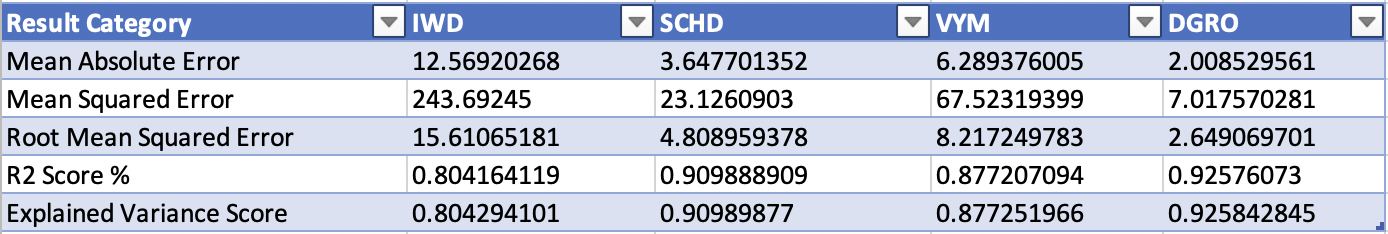

# Step 13 - Conclusion

The linear regression / machine learning model was trained efficiently as it accurately predicted the odds of share price (from any of the top 4 large value funds - IWD, SCHD, VYM, DGRO) increment in the future or 'tomorrow'. Realistically nobody can predict future prices for certain but we are aware (as seen in the financial analysis' Moving Averages graphs - Jupyter Notebooks 1 through 3) that Index Funds tend to increase in value with respect to time despite economic downturns or outlying events (such COVID Pandemic). R2 score & variance score were higher than 70% which is good & the models predict prices to continue increasing throughout the years, however, error is expected to be high as the market has plenty of ups & downs - therefore multiple data points' predictions are inaccurate. Interestingly, the error results from the Value funds' model is much lower than the error results from the Blend funds despite dividend ETFs' higher volatility.   